# Phase 4 Project

## Time Series Model

Let us start by loading the datasets and see what type of data we are dealing with

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pylab import rcParams
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

Let's load US energy generation

In [2]:
df = pd.read_csv('organised_Gen.csv',
                 parse_dates={ 'date': ['YEAR', 'MONTH'] })
df

date  Unnamed: 0 STATE                         TYPE OF PRODUCER  \
0      2001-01-01           0    AK            Total Electric Power Industry   
1      2001-01-01           1    AK            Total Electric Power Industry   
2      2001-01-01           2    AK            Total Electric Power Industry   
3      2001-01-01           3    AK            Total Electric Power Industry   
4      2001-01-01           4    AK            Total Electric Power Industry   
...           ...         ...   ...                                      ...   
496769 2022-05-01       10581    WY  Electric Generators, Electric Utilities   
496770 2022-05-01       10582    WY  Electric Generators, Electric Utilities   
496771 2022-05-01       10583    WY  Electric Generators, Electric Utilities   
496772 2022-05-01       10584    WY  Electric Generators, Electric Utilities   
496773 2022-05-01       10585    WY  Electric Generators, Electric Utilities   

                     ENERGY SOURCE  GENERATION (Megawatthours)  
0                             Coal                     46903.0  
1                        Petroleum                     71085.0  
2                      Natural Gas                    367521.0  
3       Hydroelectric Conventional                    104549.0  
4                             Wind                        87.0  
...                            ...                         ...  
496769                        Coal                   2071403.0  
496770  Hydroelectric Conventional                     96790.0  
496771                 Natural Gas                     91570.0  
496772                   Petroleum                      1812.0  
496773                        Wind                    452913.0  

[496774 rows x 6 columns]

In [3]:
df.set_index('date', inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
df

STATE                         TYPE OF PRODUCER  \
date                                                        
2001-01-01    AK            Total Electric Power Industry   
2001-01-01    AK            Total Electric Power Industry   
2001-01-01    AK            Total Electric Power Industry   
2001-01-01    AK            Total Electric Power Industry   
2001-01-01    AK            Total Electric Power Industry   
...          ...                                      ...   
2022-05-01    WY  Electric Generators, Electric Utilities   
2022-05-01    WY  Electric Generators, Electric Utilities   
2022-05-01    WY  Electric Generators, Electric Utilities   
2022-05-01    WY  Electric Generators, Electric Utilities   
2022-05-01    WY  Electric Generators, Electric Utilities   

                         ENERGY SOURCE  GENERATION (Megawatthours)  
date                                                                
2001-01-01                        Coal                     46903.0  
2001-01-01                   Petroleum                     71085.0  
2001-01-01                 Natural Gas                    367521.0  
2001-01-01  Hydroelectric Conventional                    104549.0  
2001-01-01                        Wind                        87.0  
...                                ...                         ...  
2022-05-01                        Coal                   2071403.0  
2022-05-01  Hydroelectric Conventional                     96790.0  
2022-05-01                 Natural Gas                     91570.0  
2022-05-01                   Petroleum                      1812.0  
2022-05-01                        Wind                    452913.0  

[496774 rows x 4 columns]

Very interesting! Could pick a couple of energy sources and analyze them in parallel

ok sure

In [4]:
df['ENERGY SOURCE'].value_counts()

Total                             73356
Natural Gas                       66684
Petroleum                         63176
Coal                              47642
Other Biomass                     46148
Hydroelectric Conventional        38842
Other                             36241
Wood and Wood Derived Fuels       30524
Wind                              25421
Solar Thermal and Photovoltaic    19393
Other Gases                       18212
Nuclear                           16754
Pumped Storage                    10139
Geothermal                         4242
Name: ENERGY SOURCE, dtype: int64

In [5]:
# df['STATE'].value_counts()

In [6]:
#TX=df.loc[df['STATE']=='TX']
#TX

In [7]:
#NY=df.loc[df['STATE']=='NY']
#NY

In [8]:
#TX['ENERGY SOURCE']

In [9]:
#TX_oil=TX.loc[TX['ENERGY SOURCE']=='Petroleum']

In [10]:
#TX_oil

In [11]:
#TX_oilf=TX_oil.loc[TX_oil['TYPE OF PRODUCER']=='Total Electric Power Industry']

In [12]:
#TX_oilf

In [13]:
#TX_oilf['GENERATION (Megawatthours)'].plot();

In [14]:
#TX_oilg=TX_oilf.iloc[1: , :]

In [15]:
#TX_oilg

In [16]:
#TX_oilg.index

In [17]:
"""fig = plt.figure(figsize=(15,10))
#plt.plot(solar)
plt.plot(TX_oilg.index,TX_oilg['GENERATION (Megawatthours)'])
plt.xticks(rotation=90)
plt.show()"""

"fig = plt.figure(figsize=(15,10))\n#plt.plot(solar)\nplt.plot(TX_oilg.index,TX_oilg['GENERATION (Megawatthours)'])\nplt.xticks(rotation=90)\nplt.show()"

In [18]:
#TX_sol=TX.loc[TX['ENERGY SOURCE']=='Solar Thermal and Photovoltaic']

In [19]:
#TX_sol

In [20]:
#TX_solt=TX_sol.loc[TX_sol['TYPE OF PRODUCER']=='Total Electric Power Industry']

In [21]:
#TX_solt['GENERATION (Megawatthours)'].plot();

In [22]:
#solar=TX_solt['2012':]

In [23]:
#solar['GENERATION (Megawatthours)'].plot();

In [24]:
US_total=df.loc[df['TYPE OF PRODUCER']=='Total Electric Power Industry']
US_total=US_total.loc[US_total['STATE']=='US-TOTAL']

#total_gen=data[data["STATE"]=="US-TOTAL"]
#total_gen=total_gen[(total_gen["TYPE OF PRODUCER"]!="Total Electric Power Industry")

In [25]:
US_total

STATE               TYPE OF PRODUCER  \
date                                                  
2001-01-01  US-TOTAL  Total Electric Power Industry   
2001-01-01  US-TOTAL  Total Electric Power Industry   
2001-01-01  US-TOTAL  Total Electric Power Industry   
2001-01-01  US-TOTAL  Total Electric Power Industry   
2001-01-01  US-TOTAL  Total Electric Power Industry   
...              ...                            ...   
2022-05-01  US-TOTAL  Total Electric Power Industry   
2022-05-01  US-TOTAL  Total Electric Power Industry   
2022-05-01  US-TOTAL  Total Electric Power Industry   
2022-05-01  US-TOTAL  Total Electric Power Industry   
2022-05-01  US-TOTAL  Total Electric Power Industry   

                             ENERGY SOURCE  GENERATION (Megawatthours)  
date                                                                    
2001-01-01                            Coal                 177287111.0  
2001-01-01                       Petroleum                  18111843.0  
2001-01-01                     Natural Gas                  42388663.0  
2001-01-01                     Other Gases                    718442.0  
2001-01-01                         Nuclear                  68707077.0  
...                                    ...                         ...  
2022-05-01                       Petroleum                   1524488.0  
2022-05-01  Solar Thermal and Photovoltaic                  15151118.0  
2022-05-01                   Other Biomass                   1440366.0  
2022-05-01                            Wind                  41891907.0  
2022-05-01     Wood and Wood Derived Fuels                   3073482.0  

[3598 rows x 4 columns]

In [26]:
US_total['ENERGY SOURCE'].value_counts()

Solar Thermal and Photovoltaic    257
Petroleum                         257
Wood and Wood Derived Fuels       257
Other Gases                       257
Geothermal                        257
Nuclear                           257
Other Biomass                     257
Total                             257
Pumped Storage                    257
Other                             257
Natural Gas                       257
Hydroelectric Conventional        257
Coal                              257
Wind                              257
Name: ENERGY SOURCE, dtype: int64

In [27]:
US_source=US_total.groupby(by=[US_total.index,"ENERGY SOURCE"]).sum().reset_index()

In [28]:
US_source=US_source[(US_source['ENERGY SOURCE']!='Total')]

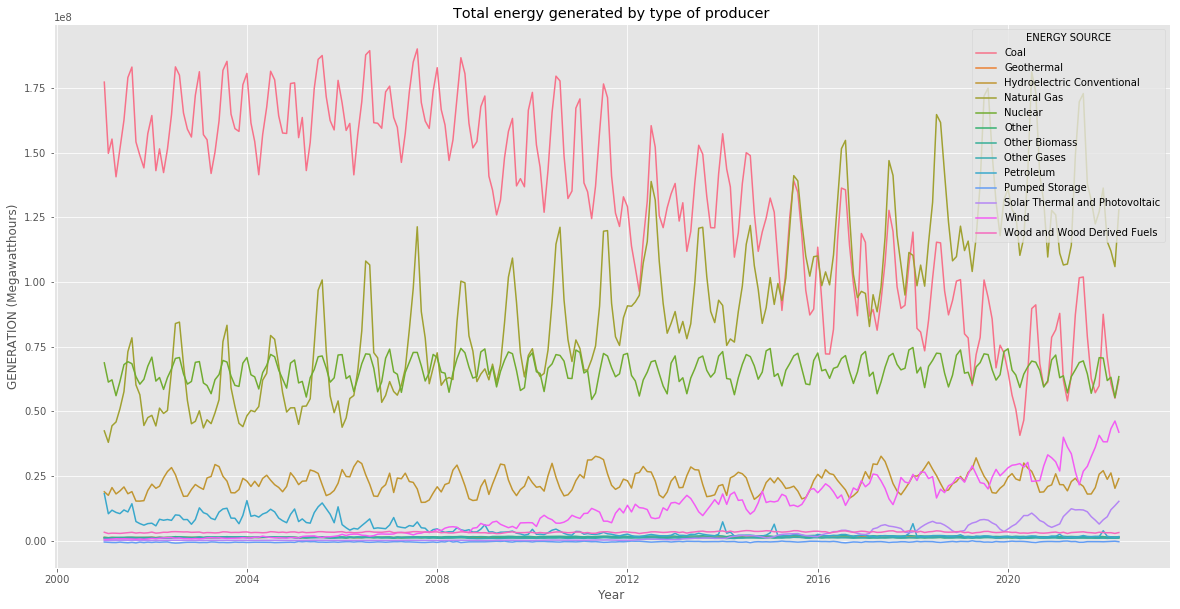

In [29]:
plt.figure(figsize=(20,10))
#Seaborn style
sns.color_palette("tab10")
#Plot - using mdates for correct datetime format
sns.lineplot(data=US_source, x=US_source['date'] ,y=US_source["GENERATION (Megawatthours)"],hue="ENERGY SOURCE")
#Plot additional properties
#plt.grid()
#plt.xticks([str(i+2001)+"-01-01" for i in range(22)])
plt.title("Total energy generated by type of producer")
plt.xlabel("Year");
plt.show()


Let us divide up the energy sources to be able to better see form the graphs their trends.

In [30]:
top_3 = ['Coal' ,'Natural Gas', 'Nuclear'] 
US_top3=US_source[US_source['ENERGY SOURCE'].isin(top_3)]

In [31]:
US_top3

date ENERGY SOURCE  GENERATION (Megawatthours)
0    2001-01-01          Coal                 177287111.0
3    2001-01-01   Natural Gas                  42388663.0
4    2001-01-01       Nuclear                  68707077.0
14   2001-02-01          Coal                 149735484.0
17   2001-02-01   Natural Gas                  37966927.0
...         ...           ...                         ...
3573 2022-04-01   Natural Gas                 105934050.0
3574 2022-04-01       Nuclear                  55289540.0
3584 2022-05-01          Coal                  62288238.0
3587 2022-05-01   Natural Gas                 127926186.0
3588 2022-05-01       Nuclear                  63381624.0

[771 rows x 3 columns]

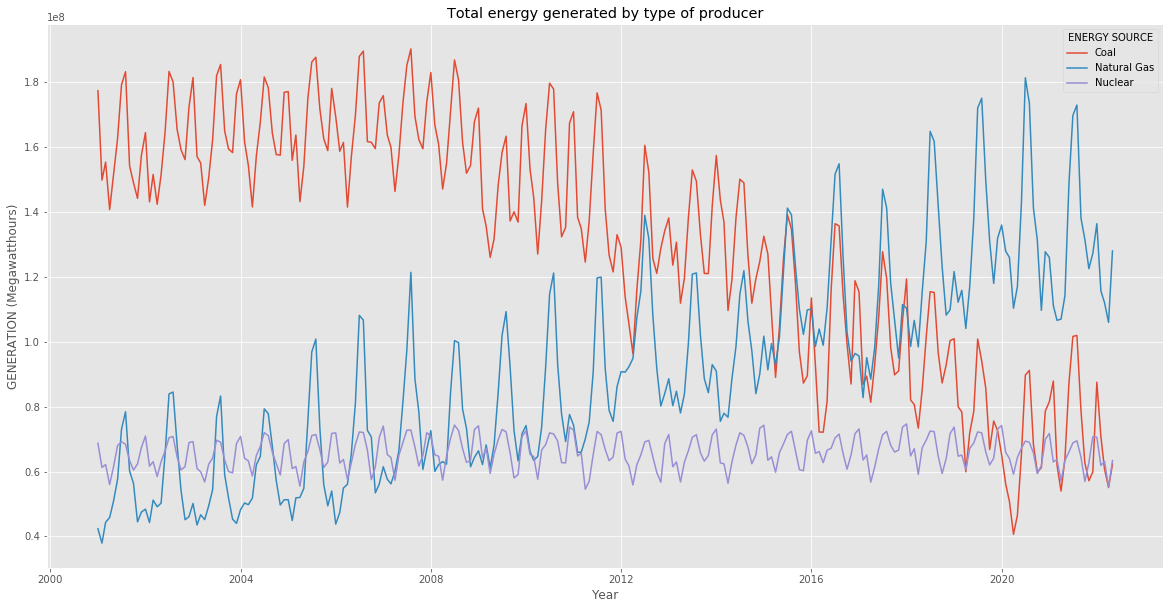

In [32]:
plt.figure(figsize=(20,10))
sns.color_palette("tab10")
sns.lineplot(data=US_top3, x=US_top3['date'] ,y=US_top3["GENERATION (Megawatthours)"],hue="ENERGY SOURCE")
plt.title("Total energy generated by type of producer")
plt.xlabel("Year");
plt.show()


In [33]:
snd_4 = ['Wind' ,'Hydroelectric Conventional', 'Solar Thermal and Photovoltaic', 'Petroleum'] 
US_snd4=US_source[US_source['ENERGY SOURCE'].isin(snd_4)]

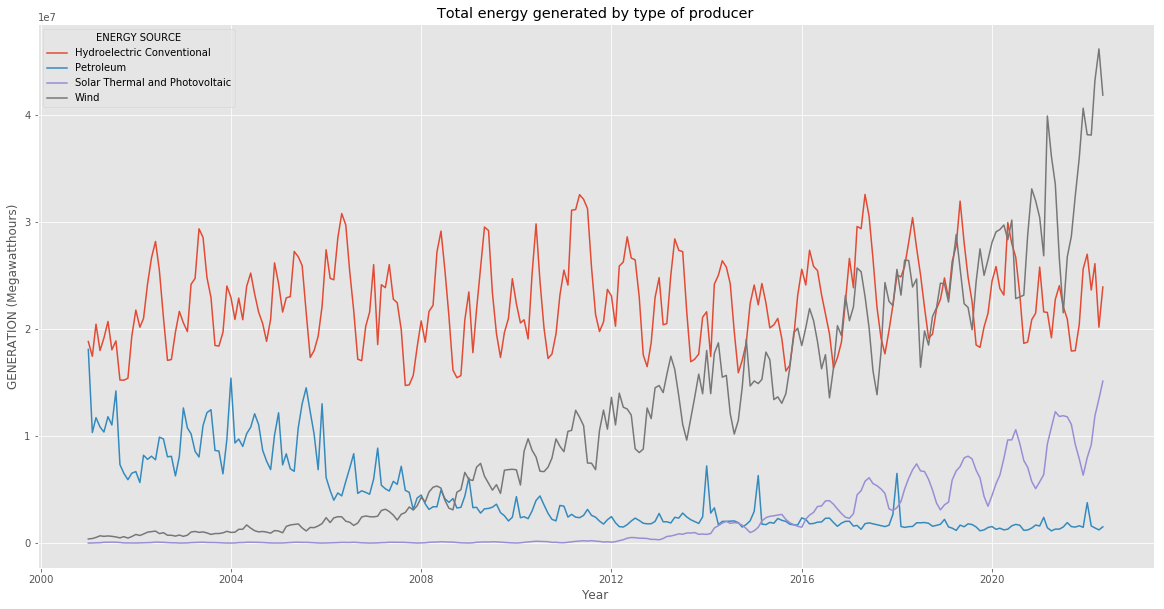

In [34]:
plt.figure(figsize=(20,10))
sns.color_palette("tab10")
sns.lineplot(data=US_snd4, x=US_snd4['date'] ,y=US_snd4["GENERATION (Megawatthours)"],hue="ENERGY SOURCE")
plt.title("Total energy generated by type of producer")
plt.xlabel("Year");
plt.show()

In [35]:
bottom=['Other','Other Gases','Pumped Storage','Wood and Wood Derived Fuels'\
        ,'Other Biomass','Geothermal']
US_bot=US_source[US_source['ENERGY SOURCE'].isin(bottom)]

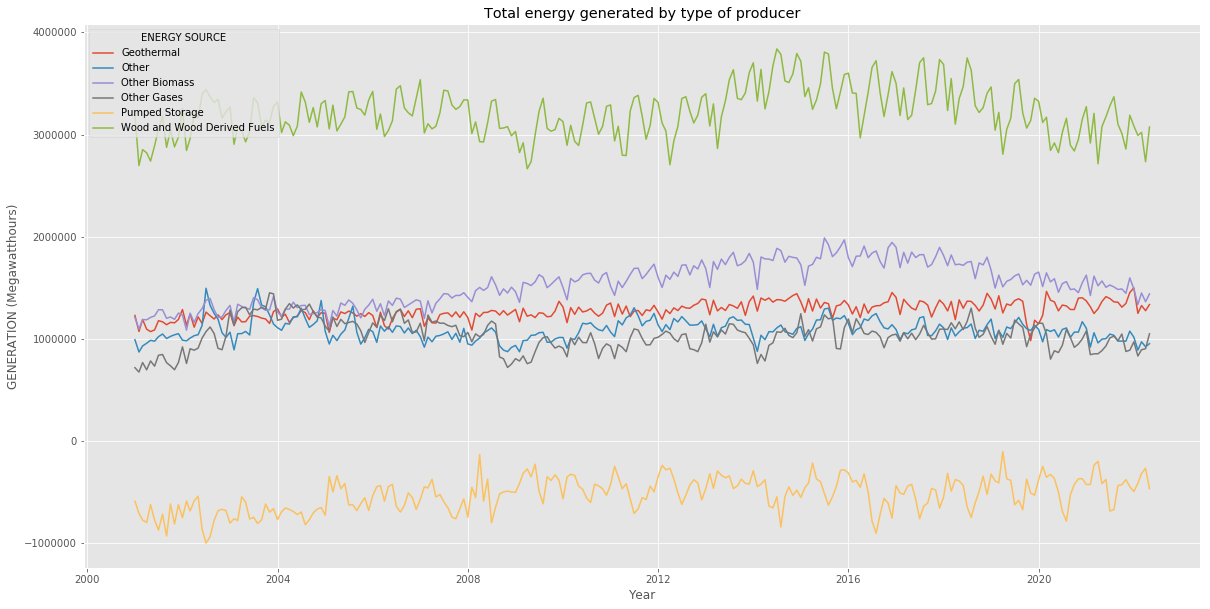

In [36]:
plt.figure(figsize=(20,10))
sns.color_palette("tab10")
sns.lineplot(data=US_bot, x=US_bot['date'] ,y=US_bot["GENERATION (Megawatthours)"],hue="ENERGY SOURCE")
plt.title("Total energy generated by type of producer")
plt.xlabel("Year");
plt.show()

The trends that have shown to be more interesting, with an upward trend over time are:
 Natural Gas, Wind and Solar. So let us preview those.

In [37]:
#US_coal=US_total.loc[US_total['ENERGY SOURCE']=='Coal']

In [38]:
#US_coal.plot();

In [39]:
#US_oil=US_total.loc[US_total['ENERGY SOURCE']=='Petroleum']
#US_oil.plot();

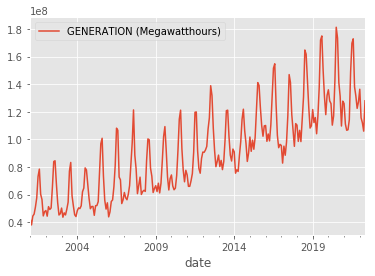

In [40]:
US_nat=US_total.loc[US_total['ENERGY SOURCE']=='Natural Gas']
US_nat.plot();

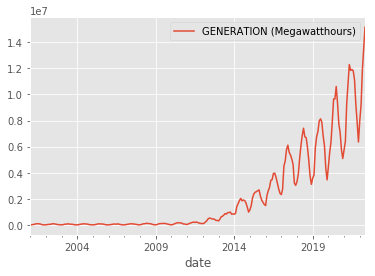

In [41]:
US_sol=US_total.loc[US_total['ENERGY SOURCE']=='Solar Thermal and Photovoltaic']
US_sol.plot();

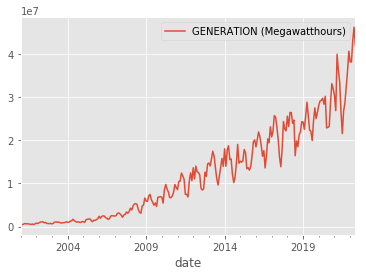

In [42]:
US_wind=US_total.loc[US_total['ENERGY SOURCE']=='Wind']
US_wind.plot();

> Maybe here could add also histogram or density plot

### Subtracting Rolling Mean

In [43]:
roll_mean = US_nat.rolling(window=8, center=False).mean()
roll_std = US_nat.rolling(window=8, center=False).std()

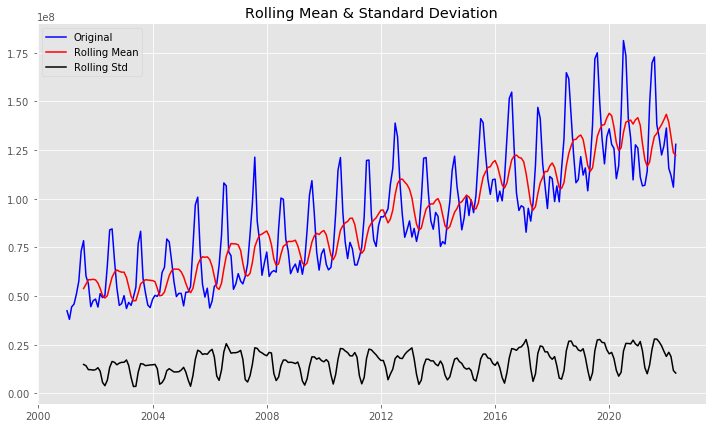

In [44]:
fig = plt.figure(figsize=(12,7))
plt.plot(US_nat["GENERATION (Megawatthours)"], color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [45]:
dftest = adfuller(US_nat["GENERATION (Megawatthours)"])

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

(-0.37362259172173357, 0.9144105810373795, 14, 242, {'1%': -3.457664132155201, '5%': -2.8735585105960224, '10%': -2.5731749894132916}, 8208.616264228112)


In [46]:
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                  -0.373623
p-value                          0.914411
#Lags Used                      14.000000
Number of Observations Used    242.000000
Critical Value (1%)             -3.457664
Critical Value (5%)             -2.873559
Critical Value (10%)            -2.573175
dtype: float64


In [47]:
wind=US_wind["GENERATION (Megawatthours)"]
nat=US_nat["GENERATION (Megawatthours)"]
sol=US_sol["GENERATION (Megawatthours)"]
#coal=US_coal["GENERATION (Megawatthours)"]
#oil=US_oil["GENERATION (Megawatthours)"]

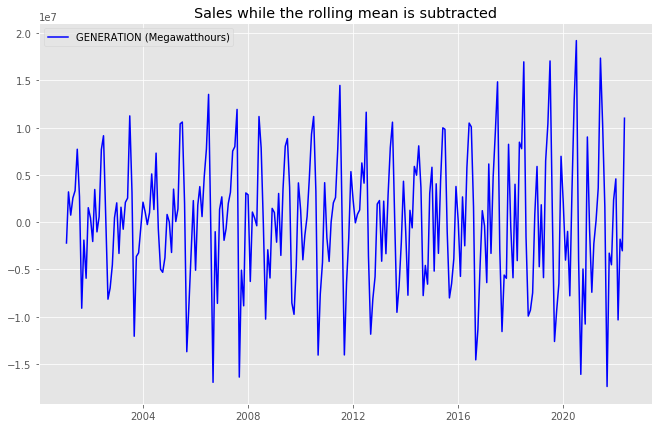

In [48]:
roll_mean_nat = US_nat['GENERATION (Megawatthours)'].rolling(window=2, center=False).mean()
# Subtract the moving average from the original data
data_mrm_nat = nat - roll_mean_nat
# Drop the missing values from time series calculated above
data_mrm_nat.dropna(inplace=True)
# Plot sales with rolling mean subtracted
fig = plt.figure(figsize=(11,7))
plt.plot(data_mrm_nat, color='blue')#,label='Sales - rolling mean')
plt.legend(loc='best')
plt.title('Sales while the rolling mean is subtracted')
plt.show();#(block=False)

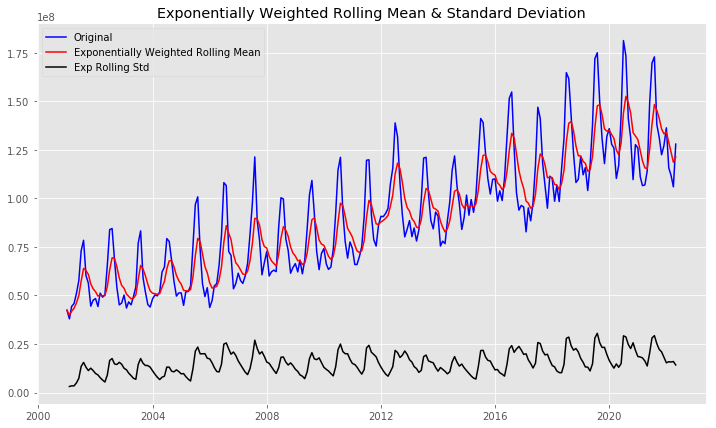

In [49]:
# Use Pandas ewm() to calculate Exponential Weighted Moving Average
exp_roll_mean = nat.ewm(halflife=2).mean()
roll_std = nat.ewm(halflife=2).std()
# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
orig = plt.plot(nat, color='blue',label='Original')
mean = plt.plot(exp_roll_mean, color='red', label='Exponentially Weighted Rolling Mean')
plt.plot(roll_std, color='black', label = 'Exp Rolling Std')
plt.legend(loc='best')
plt.title('Exponentially Weighted Rolling Mean & Standard Deviation')
plt.show(block=False)

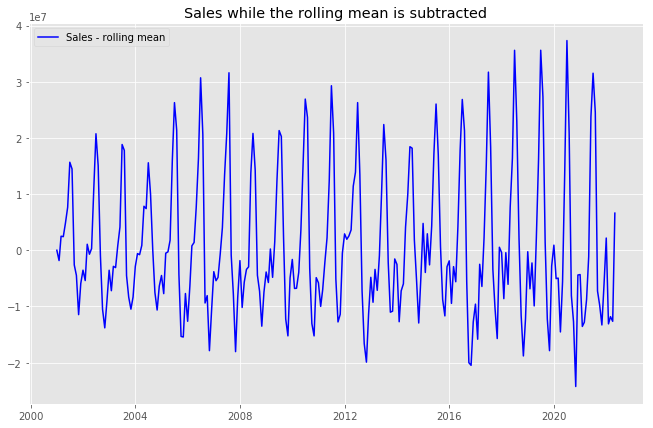

In [50]:
# Subtract the moving average from the original data
data_minus_exp_roll_mean = nat - exp_roll_mean
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_exp_roll_mean, color='blue',label='Sales - rolling mean')
plt.legend(loc='best')
plt.title('Sales while the rolling mean is subtracted')
plt.show(block=False)

In [51]:
dftest = adfuller(data_mrm_nat)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                  -4.136855
p-value                          0.000841
#Lags Used                      13.000000
Number of Observations Used    242.000000
Critical Value (1%)             -3.457664
Critical Value (5%)             -2.873559
Critical Value (10%)            -2.573175
dtype: float64


In [52]:
dftest = adfuller(data_minus_exp_roll_mean)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                  -4.995365
p-value                          0.000023
#Lags Used                      15.000000
Number of Observations Used    241.000000
Critical Value (1%)             -3.457779
Critical Value (5%)             -2.873609
Critical Value (10%)            -2.573202
dtype: float64


> Here maybe a paragraph in which you explain what it means, the fact that the residualas are stationary and why do we subract the rolling mean, because there is a dependence on the previous periods, specifically the amounts of periods specified in the window. And that expotential means the ones closer in time are more relevant then the others.

## Series Decomposition

**When log is better than natural, is because the trend is exponential (grothw in our case) inste of linear growth.**

### Decomposing Natural Gas Log and then normal

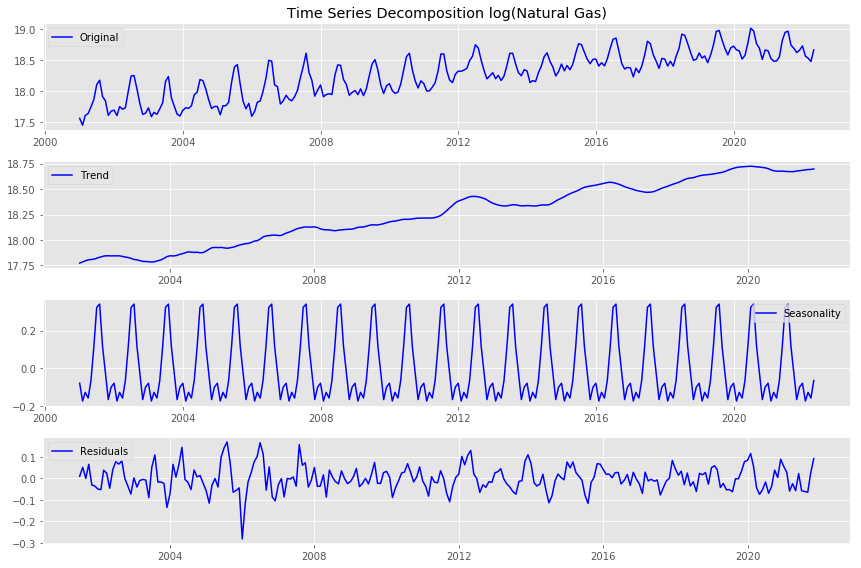

In [53]:
decomposition = seasonal_decompose(np.log(nat))

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.title('Time Series Decomposition log(Natural Gas)')
plt.plot(np.log(nat), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')

plt.tight_layout();

In [54]:
residual.dropna(inplace=True)

In [55]:
dftest = adfuller(residual)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -9.729587e+00
p-value                        9.079601e-17
#Lags Used                     8.000000e+00
Number of Observations Used    2.360000e+02
Critical Value (1%)           -3.458366e+00
Critical Value (5%)           -2.873866e+00
Critical Value (10%)          -2.573339e+00
dtype: float64


### Decomposing Natural Gas

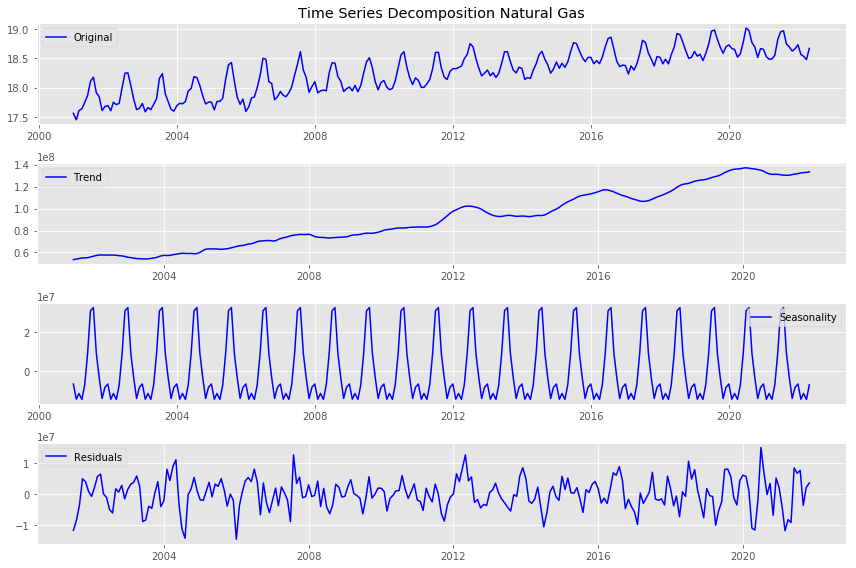

In [56]:
decomposition = seasonal_decompose(nat)

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.title('Time Series Decomposition Natural Gas')
plt.plot(np.log(nat), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')

plt.tight_layout();

In [57]:
residual.dropna(inplace=True)

In [58]:
dftest = adfuller(residual)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -9.881169e+00
p-value                        3.766672e-17
#Lags Used                     8.000000e+00
Number of Observations Used    2.360000e+02
Critical Value (1%)           -3.458366e+00
Critical Value (5%)           -2.873866e+00
Critical Value (10%)          -2.573339e+00
dtype: float64


In [59]:
""" THIS IS STILL A QUESTION IN TERMS OF DOES IT MAKE SENSE TO DO
DECOMPOSITION WITH data minus mean

decomposition = seasonal_decompose(np.log(data_minus_exp_roll_mean[2:]))

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(data), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()"""

" THIS IS STILL A QUESTION IN TERMS OF DOES IT MAKE SENSE TO DO\nDECOMPOSITION WITH data minus mean\n\ndecomposition = seasonal_decompose(np.log(data_minus_exp_roll_mean[2:]))\n\n# Gather the trend, seasonality, and residuals \ntrend = decomposition.trend\nseasonal = decomposition.seasonal\nresidual = decomposition.resid\n\n# Plot gathered statistics\nplt.figure(figsize=(12,8))\nplt.subplot(411)\nplt.plot(np.log(data), label='Original', color='blue')\nplt.legend(loc='best')\nplt.subplot(412)\nplt.plot(trend, label='Trend', color='blue')\nplt.legend(loc='best')\nplt.subplot(413)\nplt.plot(seasonal,label='Seasonality', color='blue')\nplt.legend(loc='best')\nplt.subplot(414)\nplt.plot(residual, label='Residuals', color='blue')\nplt.legend(loc='best')\nplt.tight_layout()"

### Decomposing log(natural gas)

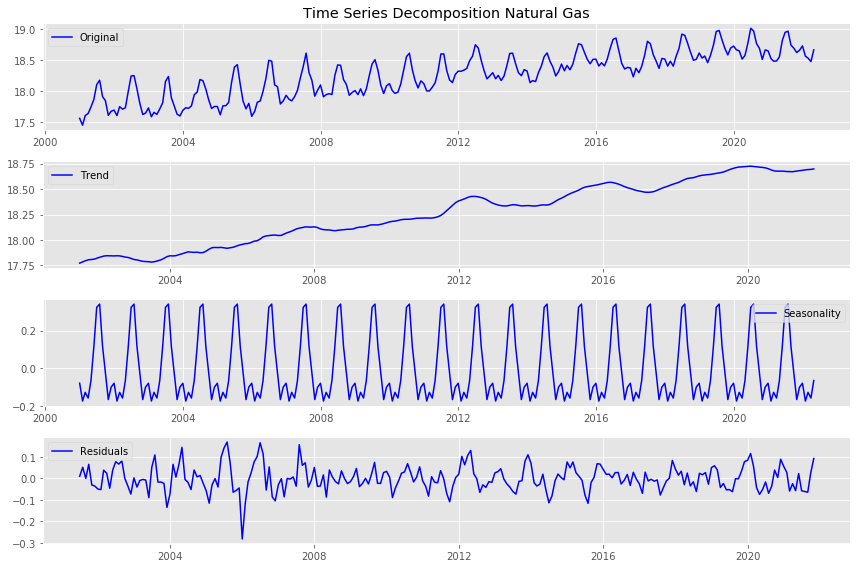

In [60]:
decomposition = seasonal_decompose(np.log(nat))

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.title('Time Series Decomposition Natural Gas')
plt.plot(np.log(nat), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')

plt.tight_layout();

In [61]:
residual.dropna(inplace=True)
dftest = adfuller(residual)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -9.729587e+00
p-value                        9.079601e-17
#Lags Used                     8.000000e+00
Number of Observations Used    2.360000e+02
Critical Value (1%)           -3.458366e+00
Critical Value (5%)           -2.873866e+00
Critical Value (10%)          -2.573339e+00
dtype: float64


### Decomposing log(Wind)

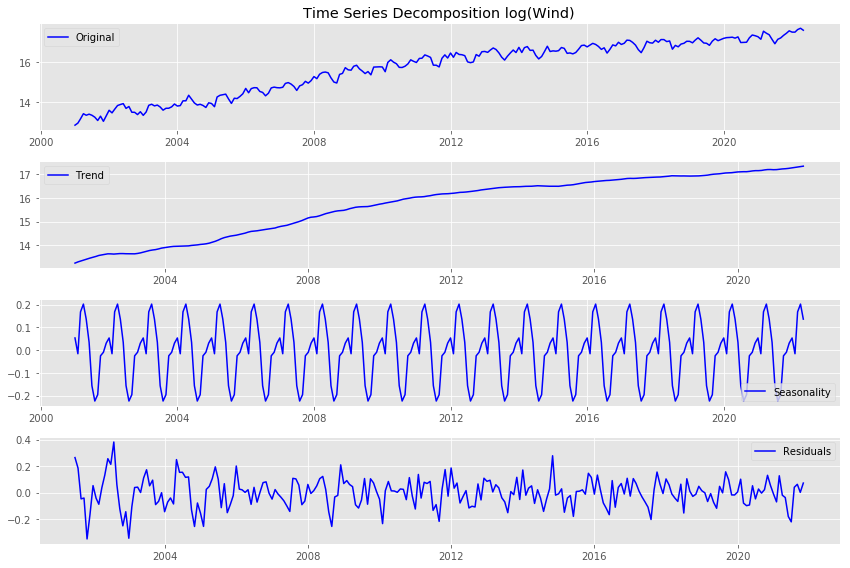

In [62]:
decomposition = seasonal_decompose(np.log(wind))

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.title('Time Series Decomposition log(Wind)')
plt.plot(np.log(wind), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')

plt.tight_layout()

In [63]:
residual.dropna(inplace=True)
dftest = adfuller(residual)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -8.379534e+00
p-value                        2.532097e-13
#Lags Used                     1.100000e+01
Number of Observations Used    2.330000e+02
Critical Value (1%)           -3.458731e+00
Critical Value (5%)           -2.874026e+00
Critical Value (10%)          -2.573424e+00
dtype: float64


### Decomposing Wind

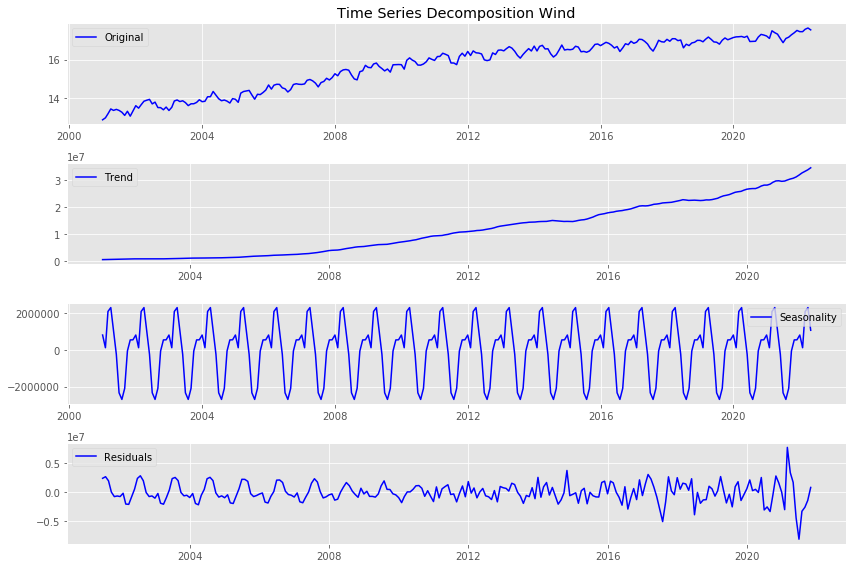

In [64]:
decomposition = seasonal_decompose(wind)

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.title('Time Series Decomposition Wind')
plt.plot(np.log(wind), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')

plt.tight_layout()

In [65]:
residual.dropna(inplace=True)
dftest = adfuller(residual)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -6.887717e+00
p-value                        1.380833e-09
#Lags Used                     1.600000e+01
Number of Observations Used    2.280000e+02
Critical Value (1%)           -3.459361e+00
Critical Value (5%)           -2.874302e+00
Critical Value (10%)          -2.573571e+00
dtype: float64


### Decomposing log(solar)

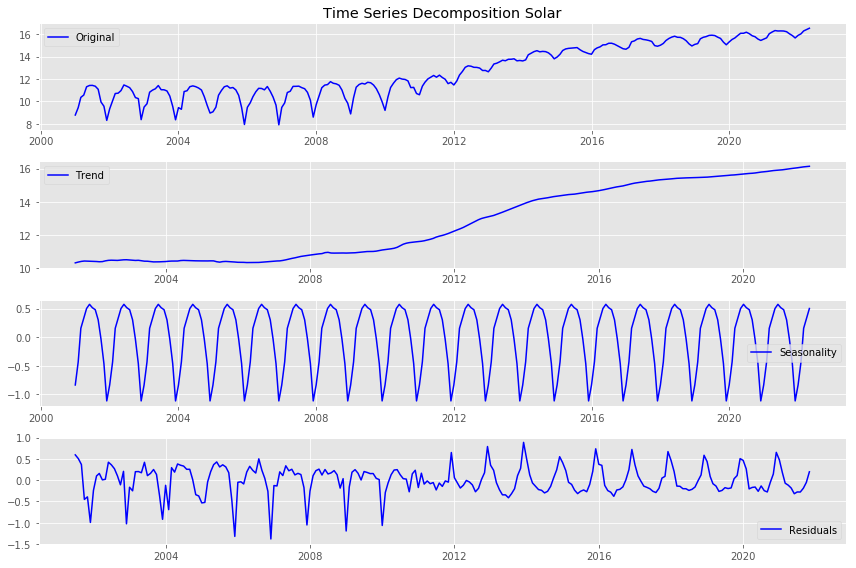

In [66]:
decomposition = seasonal_decompose(np.log(sol))

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.title('Time Series Decomposition Solar')
plt.plot(np.log(sol), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

In [67]:
residual.dropna(inplace=True)
dftest = adfuller(residual)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -7.054246e+00
p-value                        5.426813e-10
#Lags Used                     1.400000e+01
Number of Observations Used    2.300000e+02
Critical Value (1%)           -3.459106e+00
Critical Value (5%)           -2.874190e+00
Critical Value (10%)          -2.573512e+00
dtype: float64


### Decomposing Solar

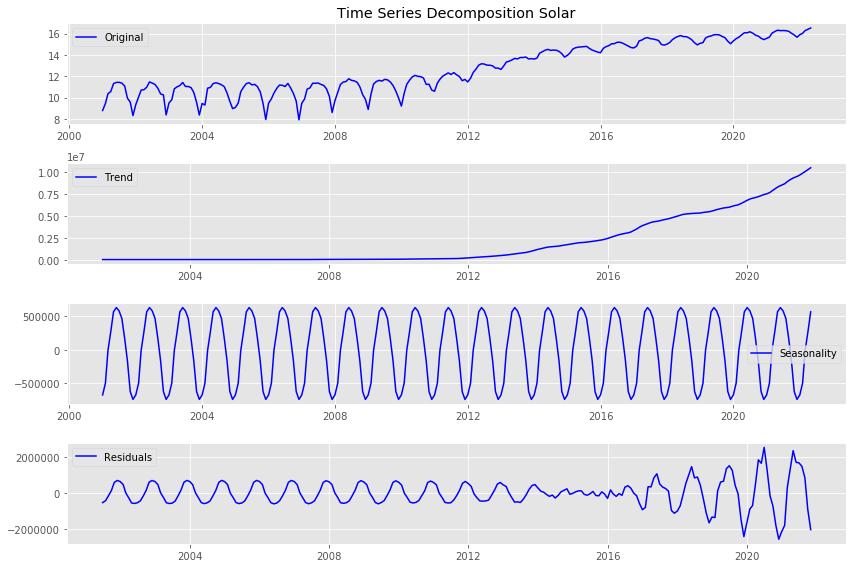

In [68]:
decomposition = seasonal_decompose(sol)

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.title('Time Series Decomposition Solar')
plt.plot(np.log(sol), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

In [69]:
residual.dropna(inplace=True)
dftest = adfuller(residual)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -9.463898e+00
p-value                        4.280951e-16
#Lags Used                     1.000000e+01
Number of Observations Used    2.340000e+02
Critical Value (1%)           -3.458608e+00
Critical Value (5%)           -2.873972e+00
Critical Value (10%)          -2.573396e+00
dtype: float64


It seems like something else is going on with solar.
I want to see if the decomposition will work better once I cut out the part that was basically zero.

In [70]:
sol

date
2001-01-01        6500.0
2001-02-01       12568.0
2001-03-01       31498.0
2001-04-01       38759.0
2001-05-01       81053.0
                 ...    
2022-01-01     8003896.0
2022-02-01     9202560.0
2022-03-01    11890566.0
2022-04-01    13484080.0
2022-05-01    15151118.0
Name: GENERATION (Megawatthours), Length: 257, dtype: float64

In [71]:
US_sol.describe()

GENERATION (Megawatthours)
count                2.570000e+02
mean                 2.147669e+06
std                  3.235459e+06
min                  2.713000e+03
25%                  6.024300e+04
50%                  1.760530e+05
75%                  3.318975e+06
max                  1.515112e+07

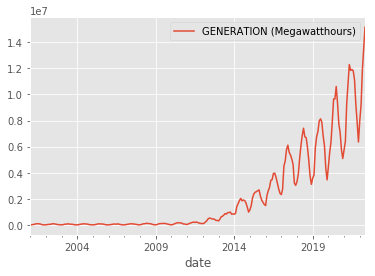

In [72]:
US_sol.plot();

In [73]:
sol2011=US_sol['2011':]

In [74]:
sol2011

STATE               TYPE OF PRODUCER  \
date                                                  
2011-01-01  US-TOTAL  Total Electric Power Industry   
2011-02-01  US-TOTAL  Total Electric Power Industry   
2011-03-01  US-TOTAL  Total Electric Power Industry   
2011-04-01  US-TOTAL  Total Electric Power Industry   
2011-05-01  US-TOTAL  Total Electric Power Industry   
...              ...                            ...   
2022-01-01  US-TOTAL  Total Electric Power Industry   
2022-02-01  US-TOTAL  Total Electric Power Industry   
2022-03-01  US-TOTAL  Total Electric Power Industry   
2022-04-01  US-TOTAL  Total Electric Power Industry   
2022-05-01  US-TOTAL  Total Electric Power Industry   

                             ENERGY SOURCE  GENERATION (Megawatthours)  
date                                                                    
2011-01-01  Solar Thermal and Photovoltaic                    39781.57  
2011-02-01  Solar Thermal and Photovoltaic                    85298.54  
2011-03-01  Solar Thermal and Photovoltaic                   122299.61  
2011-04-01  Solar Thermal and Photovoltaic                   164006.23  
2011-05-01  Solar Thermal and Photovoltaic                   190669.11  
...                                    ...                         ...  
2022-01-01  Solar Thermal and Photovoltaic                  8003896.00  
2022-02-01  Solar Thermal and Photovoltaic                  9202560.00  
2022-03-01  Solar Thermal and Photovoltaic                 11890566.00  
2022-04-01  Solar Thermal and Photovoltaic                 13484080.00  
2022-05-01  Solar Thermal and Photovoltaic                 15151118.00  

[137 rows x 4 columns]

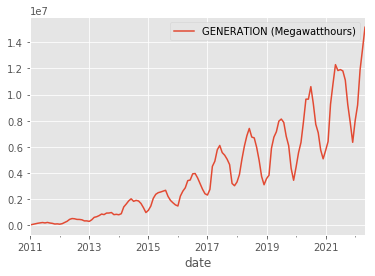

In [75]:
sol2011.plot();

In [76]:
sol2012=US_sol['2012':]

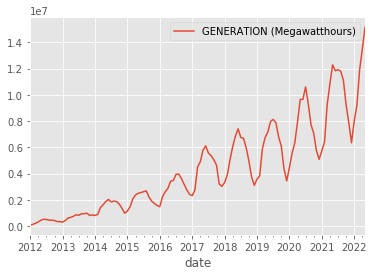

In [77]:
sol2012.plot();

In [78]:
sol11=sol2011["GENERATION (Megawatthours)"]
sol12=sol2012["GENERATION (Megawatthours)"]

### Decomposing solar after 2011

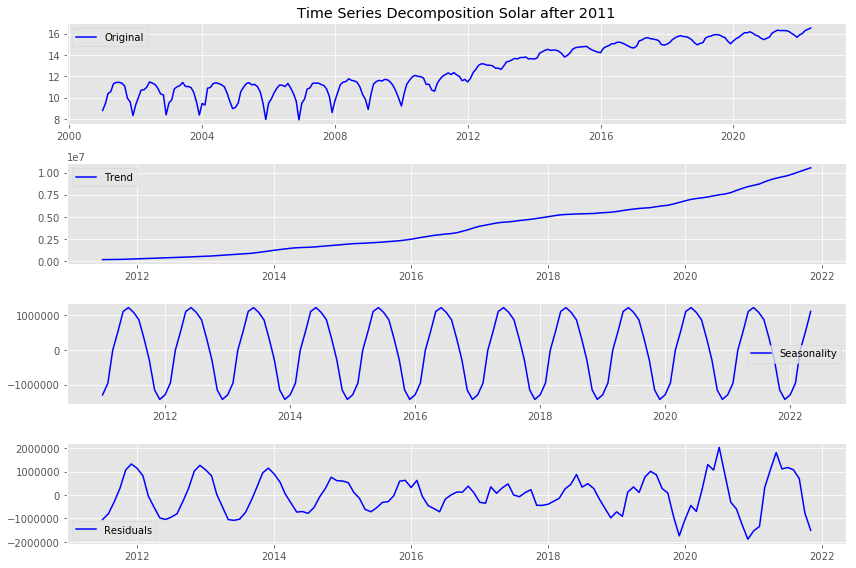

In [79]:
decomposition = seasonal_decompose(sol11)

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.title('Time Series Decomposition Solar after 2011')
plt.plot(np.log(sol), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

In [80]:
residual.dropna(inplace=True)
dftest = adfuller(residual)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -6.089199e+00
p-value                        1.046385e-07
#Lags Used                     1.100000e+01
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


### Log

In [81]:
decomposition = seasonal_decompose(np.log(sol11))

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
residual.dropna(inplace=True)
dftest = adfuller(residual)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -6.037527e+00
p-value                        1.370680e-07
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64


### Solar after 2012

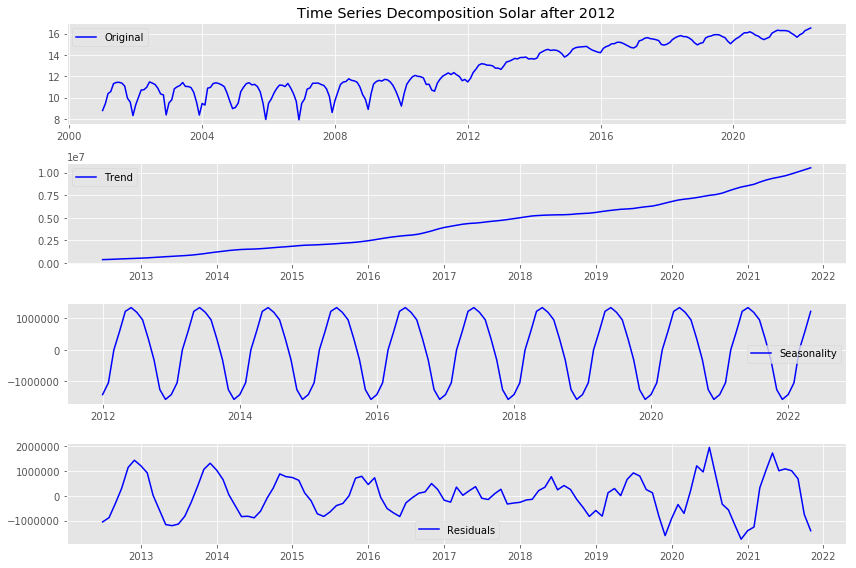

In [82]:
decomposition = seasonal_decompose(sol12)

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.title('Time Series Decomposition Solar after 2012')
plt.plot(np.log(sol), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

In [83]:
residual.dropna(inplace=True)
dftest = adfuller(residual)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -5.880925e+00
p-value                        3.079799e-07
#Lags Used                     1.100000e+01
Number of Observations Used    1.010000e+02
Critical Value (1%)           -3.496818e+00
Critical Value (5%)           -2.890611e+00
Critical Value (10%)          -2.582277e+00
dtype: float64


### Log

In [84]:
decomposition = seasonal_decompose(np.log(sol12))

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
residual.dropna(inplace=True)
dftest = adfuller(residual)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -5.763087e+00
p-value                        5.613159e-07
#Lags Used                     7.000000e+00
Number of Observations Used    1.050000e+02
Critical Value (1%)           -3.494220e+00
Critical Value (5%)           -2.889485e+00
Critical Value (10%)          -2.581676e+00
dtype: float64


### Multiplicative instead of additive models

Not getting better. Let's try multiplicative instead of additive. Back to the whole series, which performed better.

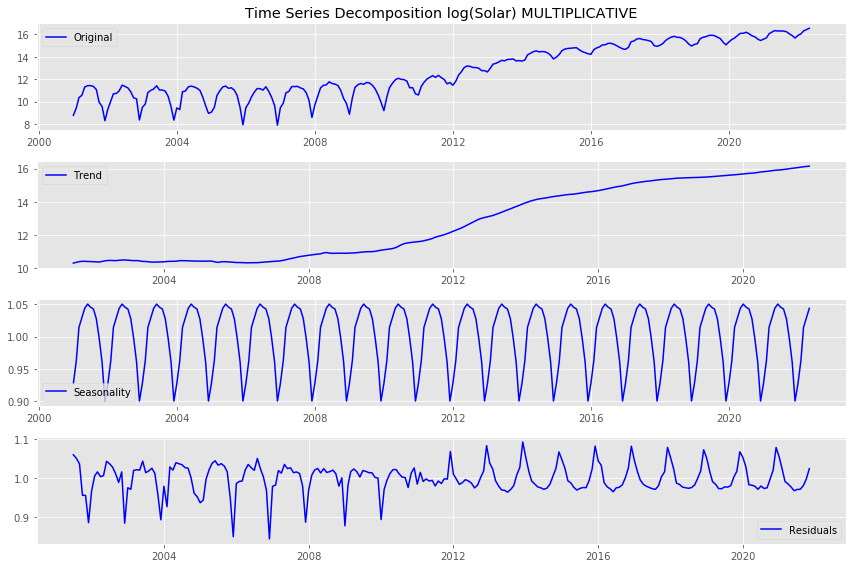

In [85]:
decomposition = seasonal_decompose(np.log(sol), model='multiplicative')

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.title('Time Series Decomposition log(Solar) MULTIPLICATIVE')
plt.plot(np.log(sol), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

In [86]:
residual.dropna(inplace=True)
dftest = adfuller(residual)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                  -5.562180
p-value                          0.000002
#Lags Used                      11.000000
Number of Observations Used    233.000000
Critical Value (1%)             -3.458731
Critical Value (5%)             -2.874026
Critical Value (10%)            -2.573424
dtype: float64


Much better!
Now out of curiosity let me try to do multiplicative for the other resources too and see if the residulas improve.

Results of Dickey-Fuller test: 

Test Statistic                -9.876429e+00
p-value                        3.871505e-17
#Lags Used                     8.000000e+00
Number of Observations Used    2.360000e+02
Critical Value (1%)           -3.458366e+00
Critical Value (5%)           -2.873866e+00
Critical Value (10%)          -2.573339e+00
dtype: float64


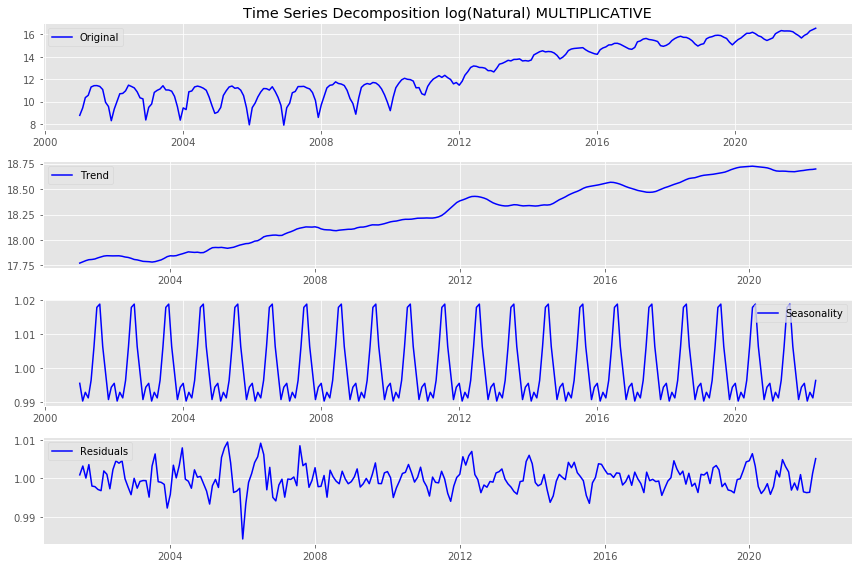

In [87]:
decomposition = seasonal_decompose(np.log(nat), model='multiplicative')

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.title('Time Series Decomposition log(Natural) MULTIPLICATIVE')
plt.plot(np.log(sol), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()
residual.dropna(inplace=True)
dftest = adfuller(residual)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -8.270774e+00
p-value                        4.800055e-13
#Lags Used                     1.100000e+01
Number of Observations Used    2.330000e+02
Critical Value (1%)           -3.458731e+00
Critical Value (5%)           -2.874026e+00
Critical Value (10%)          -2.573424e+00
dtype: float64


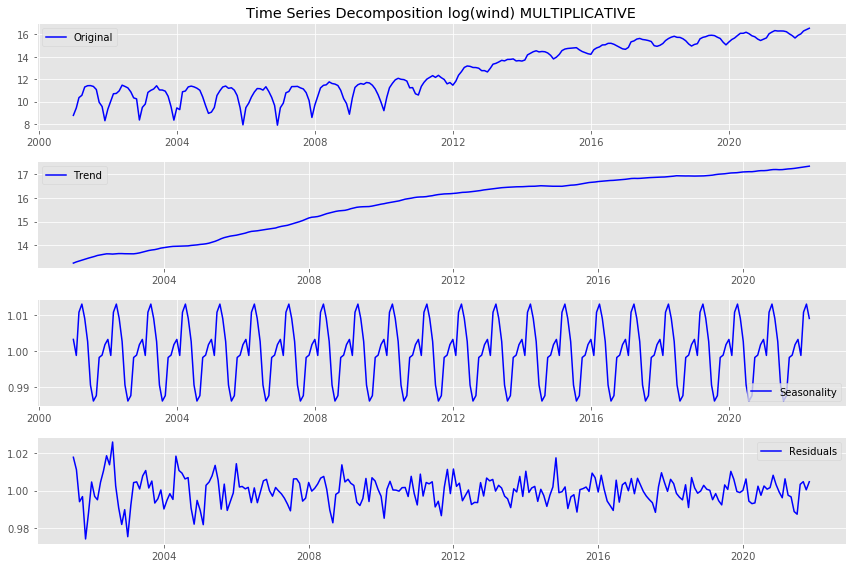

In [88]:
decomposition = seasonal_decompose(np.log(wind), model='multiplicative')

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.title('Time Series Decomposition log(wind) MULTIPLICATIVE')
plt.plot(np.log(sol), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()
residual.dropna(inplace=True)
dftest = adfuller(residual)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Still unclear if it is multiplicative or no for wind and natural gas, since it is basically the same.
For solar though there seems to be a great improvement with the multiplicative model at least in the scale of the residuals.
But need to stuyd it more because if I do multiplicative non log for some reason it gets worse.

### Multiplicative natural instead of log

Results of Dickey-Fuller test: 

Test Statistic                  -1.261344
p-value                          0.646667
#Lags Used                      12.000000
Number of Observations Used    232.000000
Critical Value (1%)             -3.458855
Critical Value (5%)             -2.874080
Critical Value (10%)            -2.573453
dtype: float64


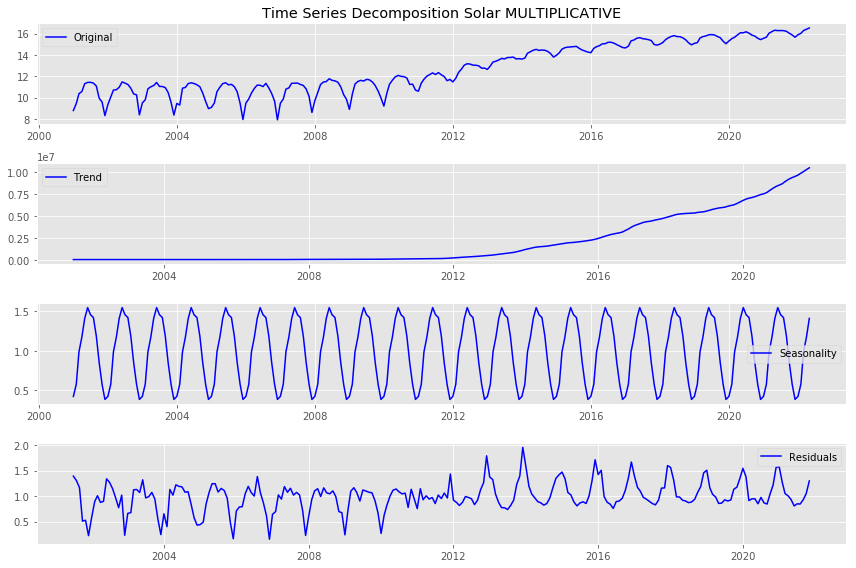

In [89]:
decomposition = seasonal_decompose(sol, model='multiplicative')

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.title('Time Series Decomposition Solar MULTIPLICATIVE')
plt.plot(np.log(sol), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()
residual.dropna(inplace=True)
dftest = adfuller(residual)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -6.495130e+00
p-value                        1.199565e-08
#Lags Used                     9.000000e+00
Number of Observations Used    2.350000e+02
Critical Value (1%)           -3.458487e+00
Critical Value (5%)           -2.873919e+00
Critical Value (10%)          -2.573367e+00
dtype: float64


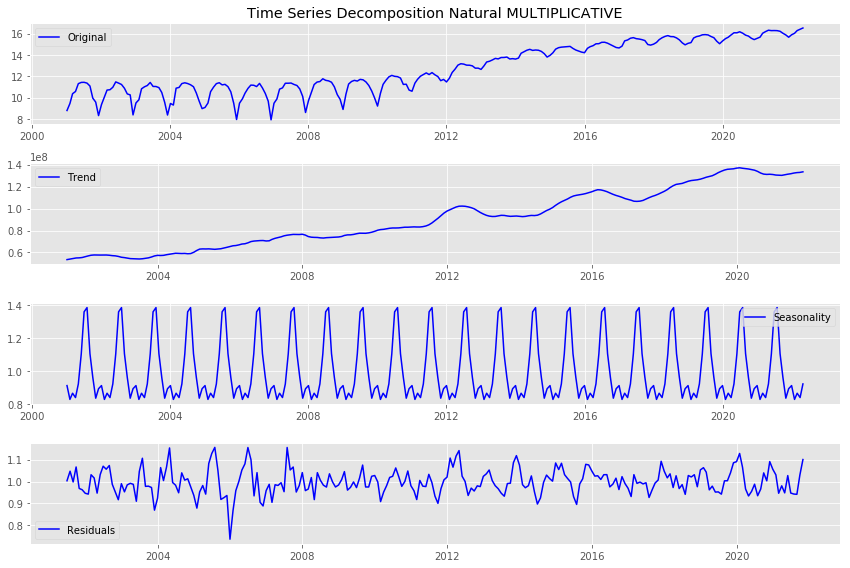

In [90]:
decomposition = seasonal_decompose(nat, model='multiplicative')

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.title('Time Series Decomposition Natural MULTIPLICATIVE')
plt.plot(np.log(sol), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()
residual.dropna(inplace=True)
dftest = adfuller(residual)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -8.168402e+00
p-value                        8.755891e-13
#Lags Used                     1.100000e+01
Number of Observations Used    2.330000e+02
Critical Value (1%)           -3.458731e+00
Critical Value (5%)           -2.874026e+00
Critical Value (10%)          -2.573424e+00
dtype: float64


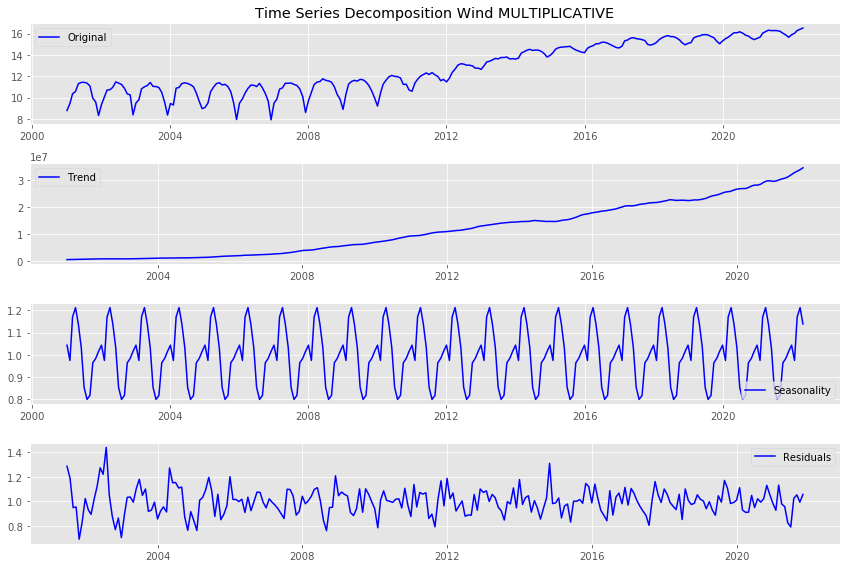

In [91]:
decomposition = seasonal_decompose(wind, model='multiplicative')

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.title('Time Series Decomposition Wind MULTIPLICATIVE')
plt.plot(np.log(sol), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()
residual.dropna(inplace=True)
dftest = adfuller(residual)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Wind and Natural Gas, non log are ok. Solar no.

### BUT
solar eve if it is lower then p result with multiplicative, it still performs better with additive. It's just a bit weird that the residuals are SO HIGH with additive, and yet the dickey fuller test has better results then the much lower scale residulas of the multiplicative model.
> Goot look into this later and figure out.

### Studying Autocorrelation

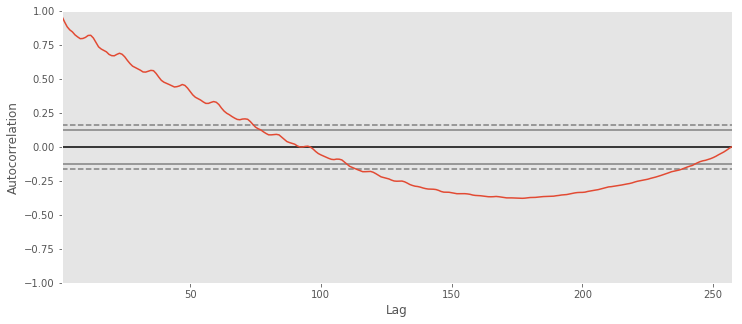

In [92]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(wind);

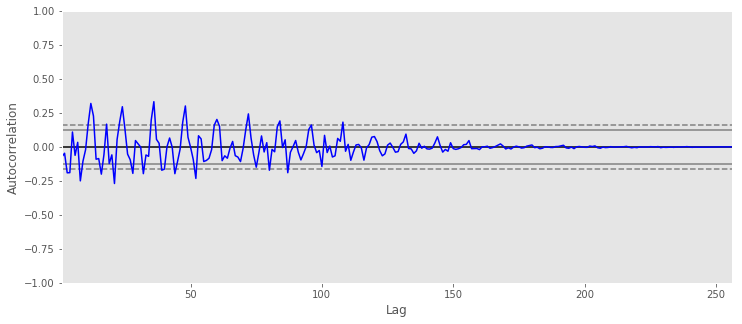

In [93]:
wind_diff = wind.diff(periods=1)
wind_diff.dropna(inplace=True)
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(wind_diff, color='b');

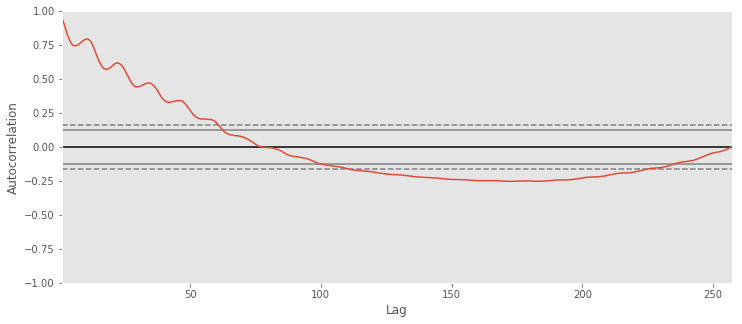

In [94]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(sol);

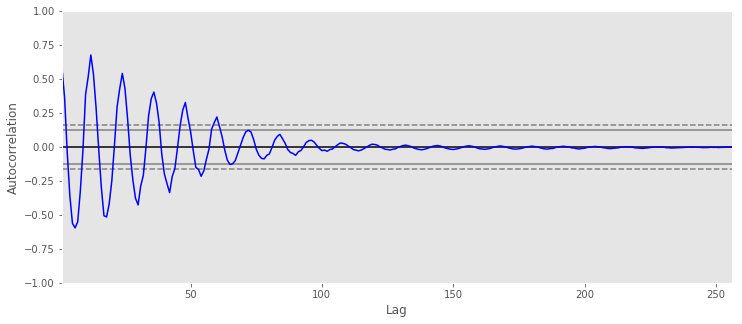

In [95]:
sol_diff = sol.diff(periods=1)
sol_diff.dropna(inplace=True)
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(sol_diff, color='b');

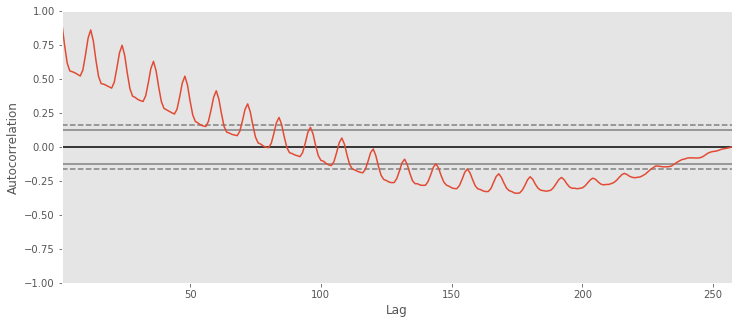

In [96]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(nat);

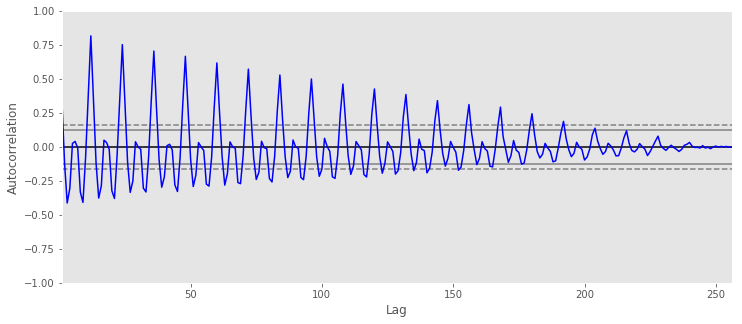

In [97]:
nat_diff = nat.diff(periods=1)
nat_diff.dropna(inplace=True)
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(nat_diff, color='b');

## PACF

### Solar

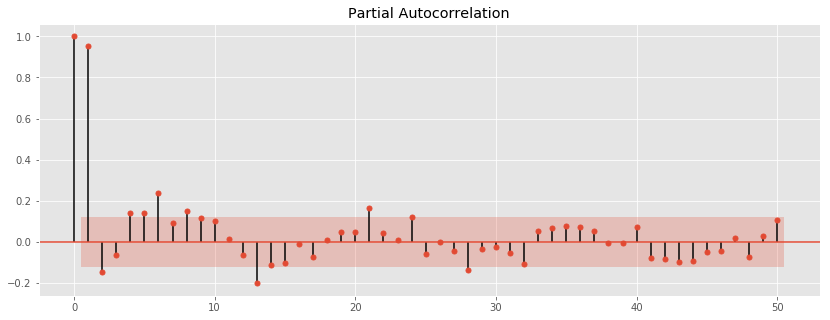

In [98]:
rcParams['figure.figsize'] = 14, 5

plot_pacf(sol, lags=50);

### Natural Gas

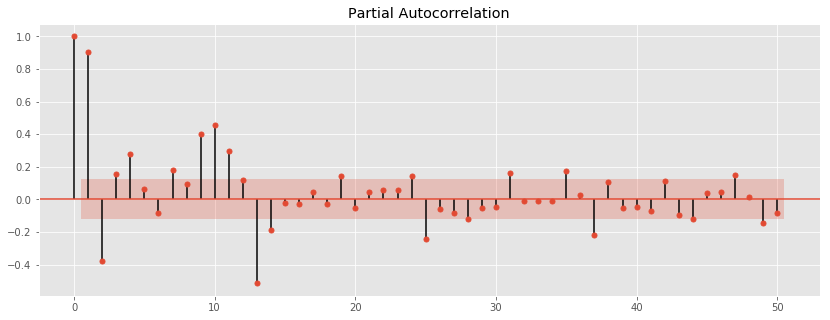

In [99]:
rcParams['figure.figsize'] = 14, 5

plot_pacf(nat, lags=50);

### Wind

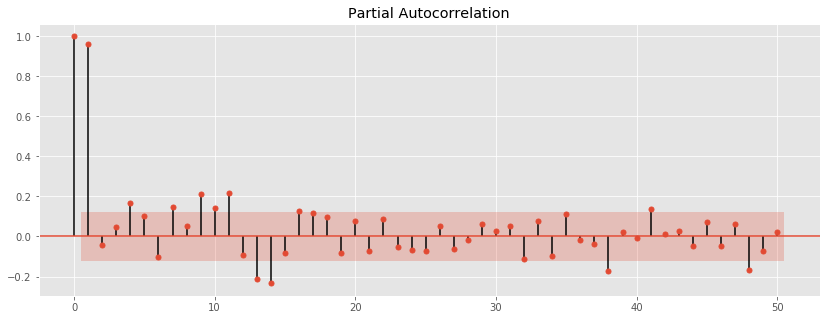

In [100]:
rcParams['figure.figsize'] = 14, 5

plot_pacf(wind, lags=50);

## ACF

### Solar

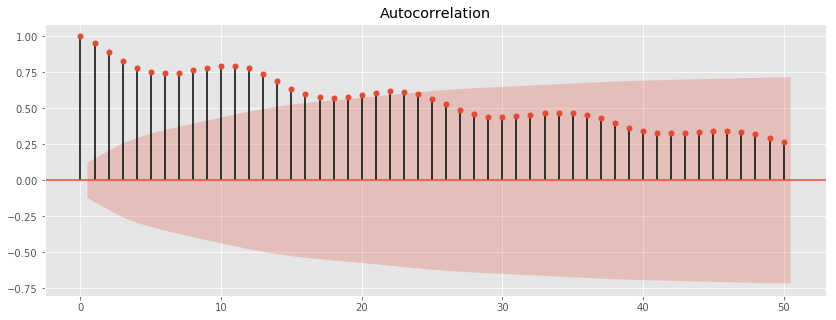

In [101]:

rcParams['figure.figsize'] = 14, 5

plot_acf(sol, lags=50);

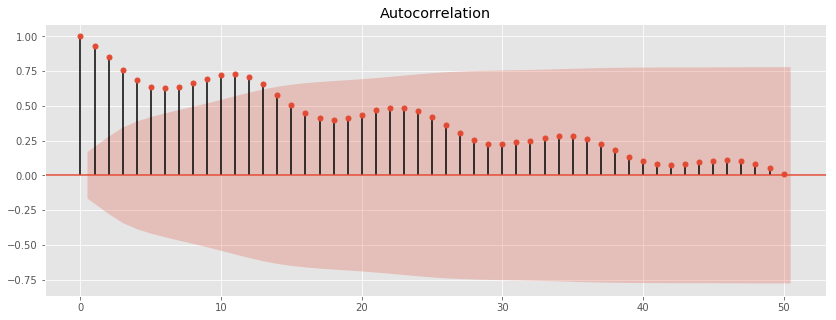

In [102]:

rcParams['figure.figsize'] = 14, 5

plot_acf(sol11, lags=50);

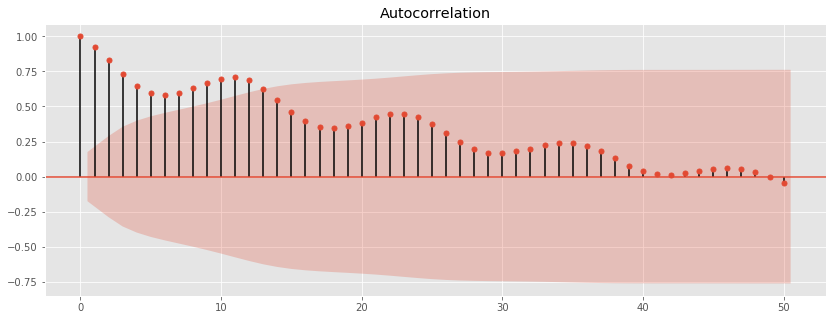

In [103]:

rcParams['figure.figsize'] = 14, 5

plot_acf(sol12, lags=50);

### Natural Gas

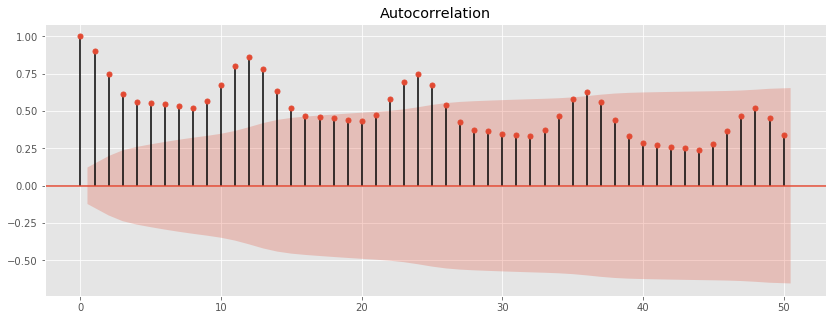

In [104]:

rcParams['figure.figsize'] = 14, 5

plot_acf(nat, lags=50);

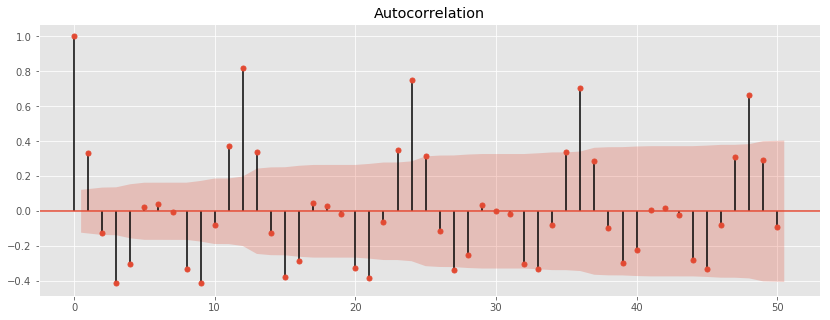

In [105]:
rcParams['figure.figsize'] = 14, 5

plot_acf(nat_diff, lags=50);

### Wind

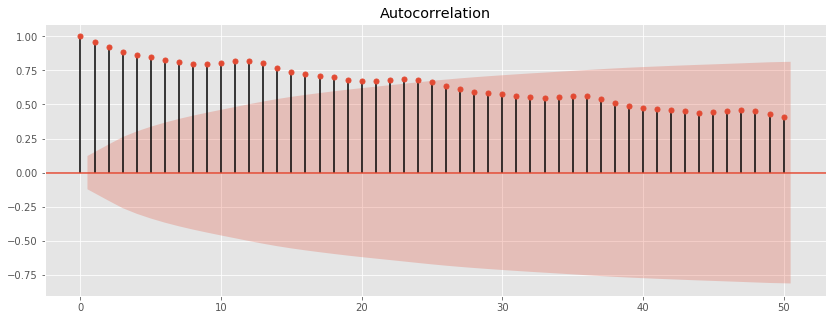

In [106]:

rcParams['figure.figsize'] = 14, 5

plot_acf(wind, lags=50);

### PACF with first difference

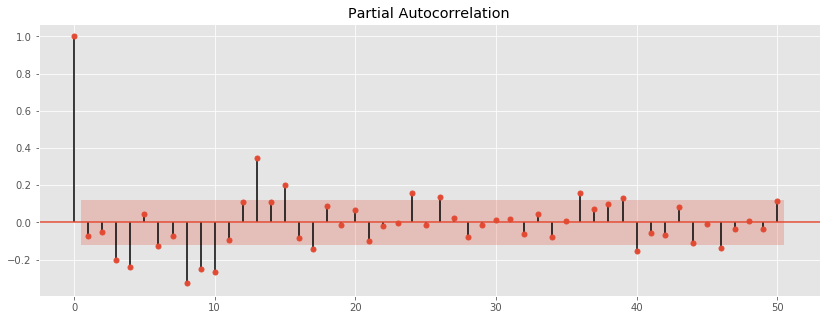

In [107]:
rcParams['figure.figsize'] = 14, 5

plot_pacf(wind_diff, lags=50);

In [108]:
nat

date
2001-01-01     42388663.0
2001-02-01     37966927.0
2001-03-01     44364414.0
2001-04-01     45842746.0
2001-05-01     50934205.0
                 ...     
2022-01-01    136317103.0
2022-02-01    115615259.0
2022-03-01    112002542.0
2022-04-01    105934050.0
2022-05-01    127926186.0
Name: GENERATION (Megawatthours), Length: 257, dtype: float64

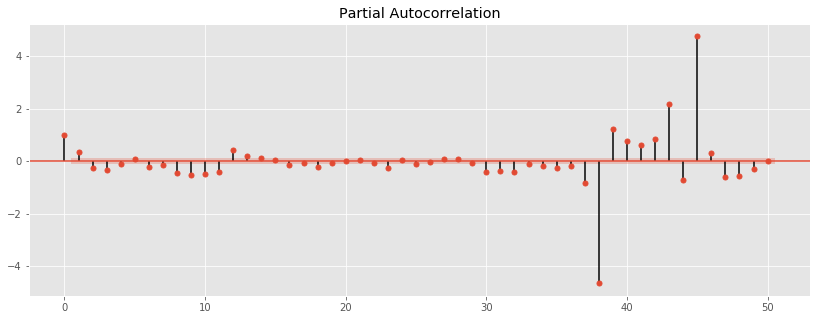

In [109]:
nat_diff = nat.diff(periods=1)
nat_diff.dropna(inplace=True)
rcParams['figure.figsize'] = 14, 5

plot_pacf(nat_diff, lags=50);

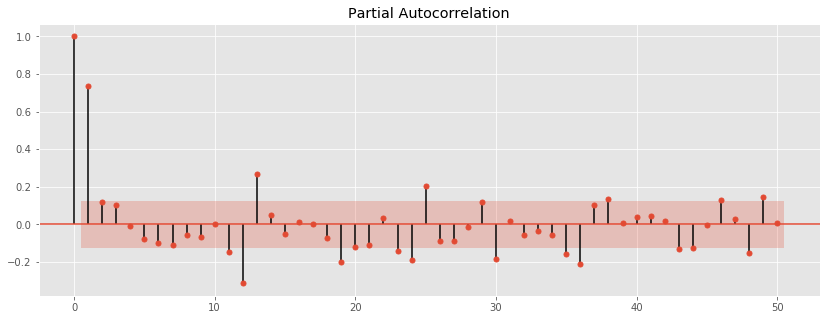

In [110]:
nat_diff = nat.diff(periods=12)
nat_diff.dropna(inplace=True)
rcParams['figure.figsize'] = 14, 5

plot_pacf(nat_diff, lags=50);

> look into this, why with periods = 12 the pacf makes much mores sense

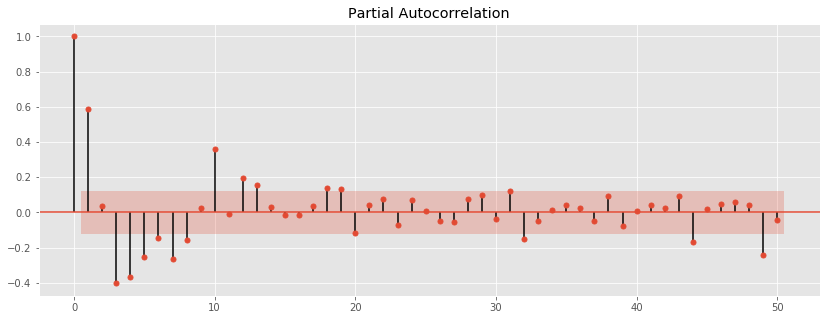

In [111]:
rcParams['figure.figsize'] = 14, 5

plot_pacf(sol_diff, lags=50);

> also: why does the PACF make more sense with the differenced 1 time series? Try to understand this.

> another idea create a DF with one column per source and then see if there is correlation between them
> the correlation can be seen with df.corr( ) and I can also do it on the series that are differenced

From here on we will dig deeper into natural gas as it is higher in production and is a more stable source of energy since it does not depend on uncontrollable factors like weather, which is the case for solar and wind.
We might go back to solar and wind after finished with Natural if there is time.

## ARMA models

### Natural Gas

In [112]:
mod_arma = ARIMA(nat, order=(1,0,0))

In [113]:
# Fit the model to data
res_arma = mod_arma.fit()

In [114]:
# Print out summary information on the fit
print(res_arma.summary())

                                   SARIMAX Results                                    
Dep. Variable:     GENERATION (Megawatthours)   No. Observations:                  257
Model:                         ARIMA(1, 0, 0)   Log Likelihood               -4578.743
Date:                        Thu, 09 Mar 2023   AIC                           9163.485
Time:                                16:01:16   BIC                           9174.133
Sample:                            01-01-2001   HQIC                          9167.767
                                 - 05-01-2022                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.067e+07   2.59e-11   3.51e+18      0.000    9.07e+07    9.07e+07
ar.L1          0.9127      0.024     38.047      0.000       0.866 

In [115]:
# Print out the estimate for the constant and for theta
print(res_arma.params)

const     9.067040e+07
ar.L1     9.126978e-01
sigma2    1.726684e+14
dtype: float64


In [116]:
mod_arma = ARIMA(nat, order=(1,1,0))

In [117]:
# Fit the model to data
res_arma = mod_arma.fit()

In [118]:
# Print out summary information on the fit
print(res_arma.summary())

                                   SARIMAX Results                                    
Dep. Variable:     GENERATION (Megawatthours)   No. Observations:                  257
Model:                         ARIMA(1, 1, 0)   Log Likelihood               -4551.341
Date:                        Thu, 09 Mar 2023   AIC                           9106.683
Time:                                16:01:16   BIC                           9113.773
Sample:                            01-01-2001   HQIC                          9109.534
                                 - 05-01-2022                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3196      0.058      5.526      0.000       0.206       0.433
sigma2      1.615e+14   4.93e-18   3.27e+31      0.000    1.61e+14 

In [119]:
mod_arma = ARIMA(nat, order=(1,1,1))

In [120]:
# Fit the model to data
res_arma = mod_arma.fit()

In [121]:
# Print out summary information on the fit
print(res_arma.summary())

                                   SARIMAX Results                                    
Dep. Variable:     GENERATION (Megawatthours)   No. Observations:                  257
Model:                         ARIMA(1, 1, 1)   Log Likelihood               -4548.462
Date:                        Thu, 09 Mar 2023   AIC                           9102.925
Time:                                16:01:16   BIC                           9113.561
Sample:                            01-01-2001   HQIC                          9107.203
                                 - 05-01-2022                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0989      0.157      0.631      0.528      -0.208       0.406
ma.L1          0.2755      0.150      1.842      0.065      -0.018 

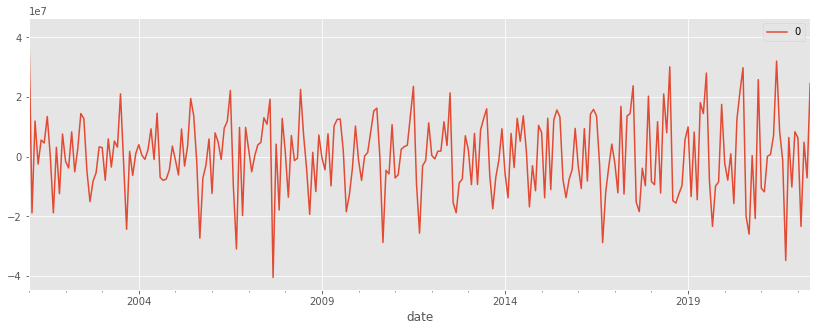

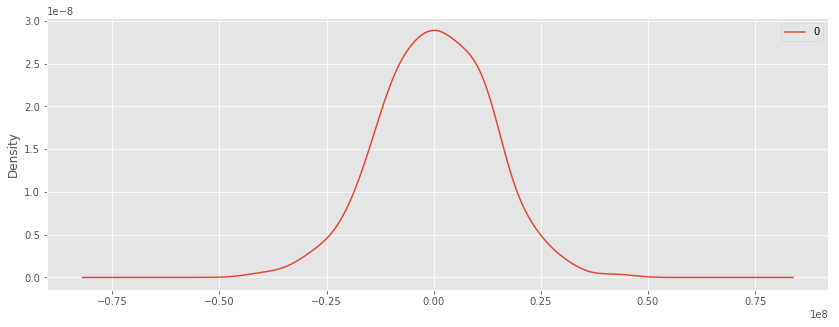

                  0
count  2.570000e+02
mean   3.831847e+05
std    1.285877e+07
min   -4.047808e+07
25%   -8.093431e+06
50%    4.185433e+05
75%    9.377678e+06
max    4.238866e+07


In [122]:
# line plot of residuals
residuals = pd.DataFrame(res_arma.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [123]:
residuals.dropna(inplace=True)
dftest = adfuller(residuals)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                  -4.518428
p-value                          0.000182
#Lags Used                      13.000000
Number of Observations Used    243.000000
Critical Value (1%)             -3.457551
Critical Value (5%)             -2.873509
Critical Value (10%)            -2.573148
dtype: float64


In [124]:
mod_arma = ARIMA(nat, order=(2,1,1))

In [125]:
# Fit the model to data
res_arma = mod_arma.fit()

In [126]:
# Print out summary information on the fit
print(res_arma.summary())

                                   SARIMAX Results                                    
Dep. Variable:     GENERATION (Megawatthours)   No. Observations:                  257
Model:                         ARIMA(2, 1, 1)   Log Likelihood               -4516.177
Date:                        Thu, 09 Mar 2023   AIC                           9040.353
Time:                                16:01:17   BIC                           9054.534
Sample:                            01-01-2001   HQIC                          9046.057
                                 - 05-01-2022                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1025      0.066     16.731      0.000       0.973       1.232
ar.L2         -0.5187      0.059     -8.808      0.000      -0.634 

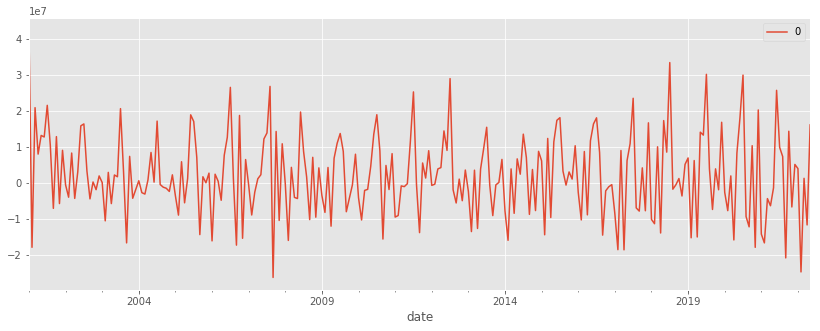

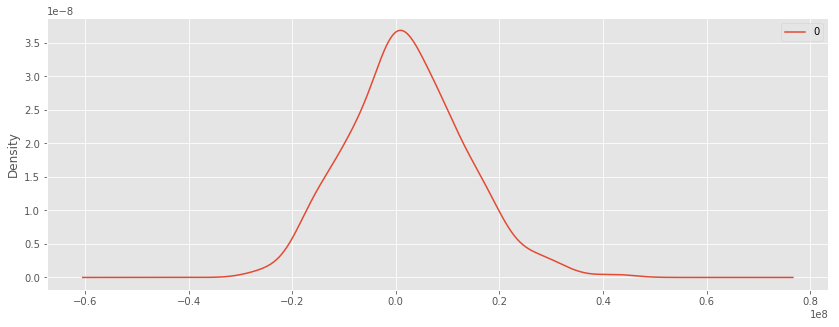

                  0
count  2.570000e+02
mean   2.118193e+06
std    1.120307e+07
min   -2.618299e+07
25%   -4.888524e+06
50%    1.323094e+06
75%    8.810333e+06
max    4.238866e+07


In [127]:
# line plot of residuals
residuals = pd.DataFrame(res_arma.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [128]:
residuals.dropna(inplace=True)
dftest = adfuller(residuals)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                  -4.923184
p-value                          0.000031
#Lags Used                      16.000000
Number of Observations Used    240.000000
Critical Value (1%)             -3.457894
Critical Value (5%)             -2.873659
Critical Value (10%)            -2.573229
dtype: float64


In [129]:
mod_arma = ARIMA(nat, order=(2,1,2))

In [130]:
res_arma = mod_arma.fit()

In [131]:
print(res_arma.summary())

                                   SARIMAX Results                                    
Dep. Variable:     GENERATION (Megawatthours)   No. Observations:                  257
Model:                         ARIMA(2, 1, 2)   Log Likelihood               -4505.411
Date:                        Thu, 09 Mar 2023   AIC                           9020.822
Time:                                16:01:18   BIC                           9038.548
Sample:                            01-01-2001   HQIC                          9027.952
                                 - 05-01-2022                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9765      0.012     84.629      0.000       0.954       0.999
ar.L2         -0.9849      0.011    -89.157      0.000      -1.007 

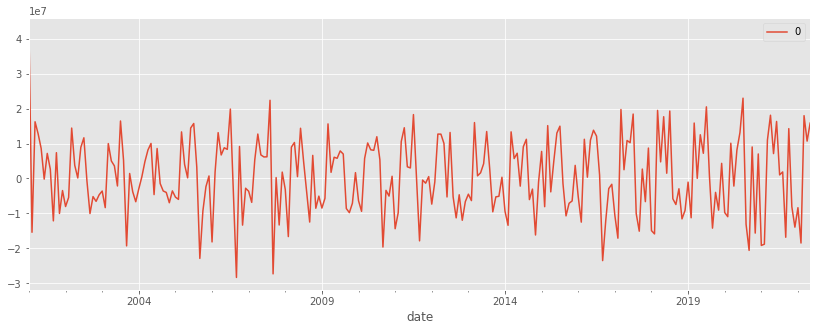

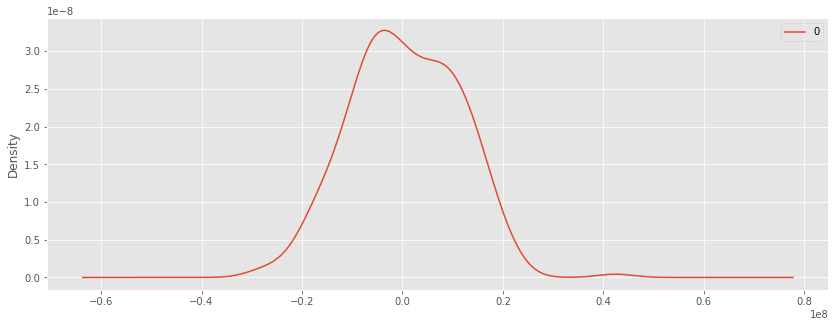

                  0
count  2.570000e+02
mean   5.539399e+05
std    1.081497e+07
min   -2.831530e+07
25%   -6.829079e+06
50%    3.696062e+05
75%    8.710575e+06
max    4.238866e+07


In [132]:
# line plot of residuals
residuals = pd.DataFrame(res_arma.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [133]:
residuals.dropna(inplace=True)
dftest = adfuller(residuals)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                  -4.642125
p-value                          0.000108
#Lags Used                      13.000000
Number of Observations Used    243.000000
Critical Value (1%)             -3.457551
Critical Value (5%)             -2.873509
Critical Value (10%)            -2.573148
dtype: float64


In [134]:
mod_arma = ARIMA(nat, order=(2,1,5))

In [135]:
res_arma = mod_arma.fit()

In [136]:
print(res_arma.summary())

                                   SARIMAX Results                                    
Dep. Variable:     GENERATION (Megawatthours)   No. Observations:                  257
Model:                         ARIMA(2, 1, 5)   Log Likelihood               -4498.048
Date:                        Thu, 09 Mar 2023   AIC                           9012.097
Time:                                16:01:19   BIC                           9040.458
Sample:                            01-01-2001   HQIC                          9023.503
                                 - 05-01-2022                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9035      0.031     28.774      0.000       0.842       0.965
ar.L2         -0.8939      0.031    -28.763      0.000      -0.955 

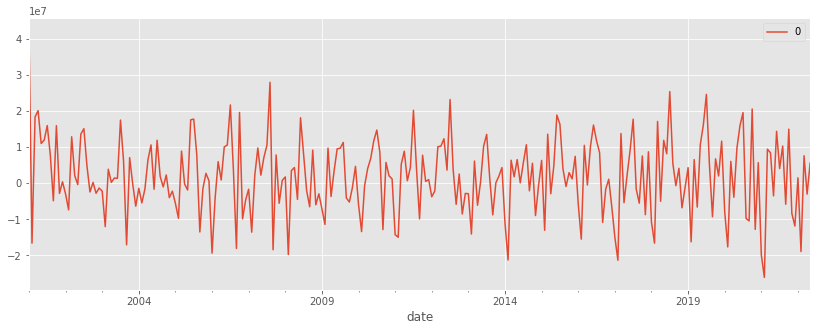

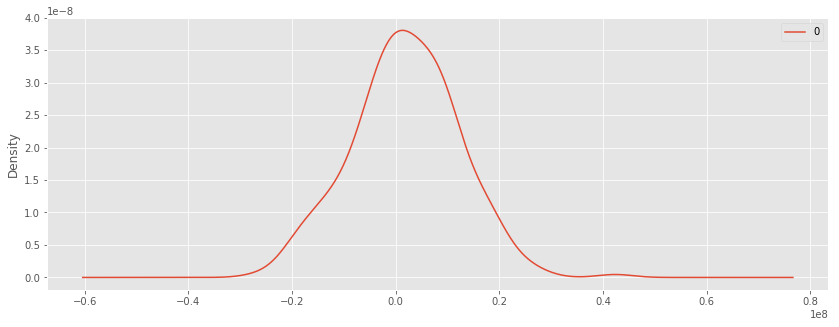

                  0
count  2.570000e+02
mean   1.914270e+06
std    1.035105e+07
min   -2.611475e+07
25%   -4.686857e+06
50%    1.911637e+06
75%    8.883851e+06
max    4.238866e+07


In [137]:
# line plot of residuals
residuals = pd.DataFrame(res_arma.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [138]:
residuals.dropna(inplace=True)
dftest = adfuller(residuals)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                  -3.993615
p-value                          0.001444
#Lags Used                      16.000000
Number of Observations Used    240.000000
Critical Value (1%)             -3.457894
Critical Value (5%)             -2.873659
Critical Value (10%)            -2.573229
dtype: float64


In [139]:
mod_arma = ARIMA(nat, order=(0,1,5))

In [140]:
res_arma = mod_arma.fit()

In [141]:
print(res_arma.summary())

                                   SARIMAX Results                                    
Dep. Variable:     GENERATION (Megawatthours)   No. Observations:                  257
Model:                         ARIMA(0, 1, 5)   Log Likelihood               -4520.800
Date:                        Thu, 09 Mar 2023   AIC                           9053.600
Time:                                16:01:20   BIC                           9074.871
Sample:                            01-01-2001   HQIC                          9062.155
                                 - 05-01-2022                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1878      0.085      2.201      0.028       0.021       0.355
ma.L2         -0.1661      0.089     -1.857      0.063      -0.341 

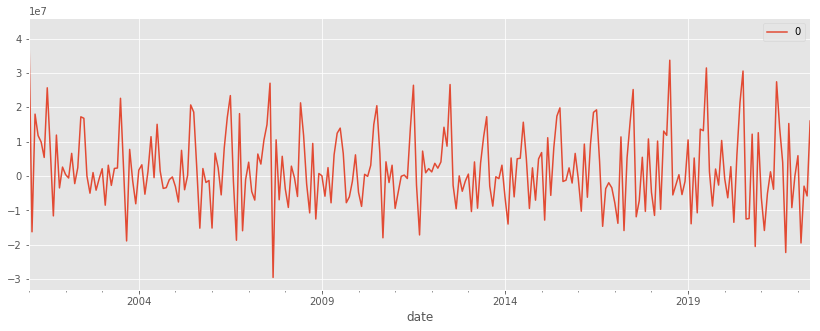

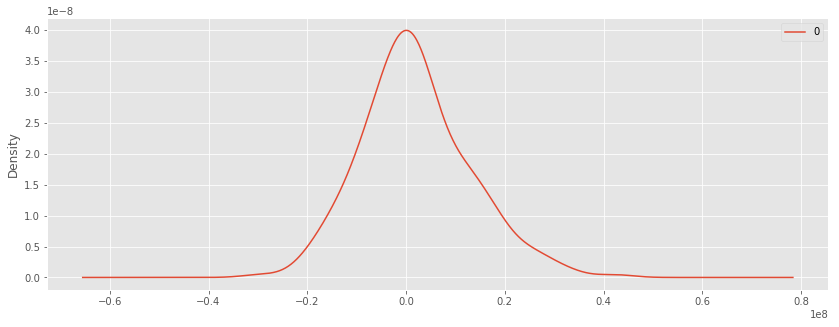

                  0
count  2.570000e+02
mean   1.962844e+06
std    1.105328e+07
min   -2.952138e+07
25%   -5.295157e+06
50%    9.352649e+05
75%    8.171865e+06
max    4.238866e+07


In [142]:
# line plot of residuals
residuals = pd.DataFrame(res_arma.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())



In [143]:
residuals.dropna(inplace=True)
dftest = adfuller(residuals)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                  -4.385208
p-value                          0.000315
#Lags Used                      16.000000
Number of Observations Used    240.000000
Critical Value (1%)             -3.457894
Critical Value (5%)             -2.873659
Critical Value (10%)            -2.573229
dtype: float64


## Grid search for ARIMA model

In [144]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
     # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error


In [215]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model_aic(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
#    predictions = list()
#    for t in range(len(test)):
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit()
    aic=model_fit.aic
#        yhat = model_fit.forecast()[0]
#        predictions.append(yhat)
#        history.append(test[t])
     # calculate out of sample error
#    error = mean_squared_error(test, predictions)
#    return error
    return aic

In [145]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [218]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models_aic(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    aic = evaluate_arima_model_aic(dataset, order)
                    if aic < best_score:
                        best_score, best_cfg = aic, order
                    print('ARIMA%s AIC=%.3f' % (order,aic))
                except:
                    continue
    print('Best ARIMA%s AIC=%.3f' % (best_cfg, best_score))

In [146]:
""" DID THIS TOOK FOREVER AND THE RESULT WAS 
Best ARIMANone MSE=inf
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(nat.values, p_values, d_values, q_values)"""

' DID THIS TOOK FOREVER AND THE RESULT WAS \nBest ARIMANone MSE=inf\n# evaluate parameters\np_values = [0, 1, 2, 4, 6, 8, 10]\nd_values = range(0, 5)\nq_values = range(0, 5)\nwarnings.filterwarnings("ignore")\nevaluate_models(nat.values, p_values, d_values, q_values)'

I will work on this later and try to find the best 3 values for the best model but for now...

## Trying modeling on the residuals

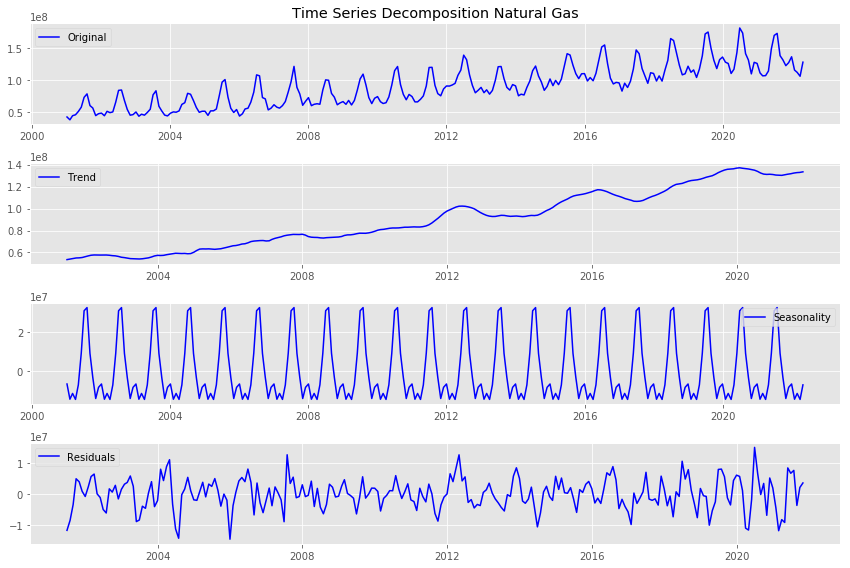

In [147]:
decomposition = seasonal_decompose(nat)

# Gather the trend, seasonality, and residuals 
trend_nat = decomposition.trend
seasonal_nat = decomposition.seasonal
residual_nat = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.title('Time Series Decomposition Natural Gas')
plt.plot((nat), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_nat, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_nat,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_nat, label='Residuals', color='blue')
plt.legend(loc='best')

plt.tight_layout();

In [148]:
mod_arma = ARIMA(residual_nat, order=(2,1,2))

In [149]:
res_arma = mod_arma.fit()

In [150]:
print(res_arma.summary())

                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                  257
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -4107.753
Date:                Thu, 09 Mar 2023   AIC                           8225.505
Time:                        16:01:22   BIC                           8243.231
Sample:                    01-01-2001   HQIC                          8232.635
                         - 05-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5279      0.107     -4.924      0.000      -0.738      -0.318
ar.L2          0.4124      0.072      5.743      0.000       0.272       0.553
ma.L1         -0.0755      0.135     -0.558      0.5

In [151]:
residuals = pd.DataFrame(res_arma.resid)
residuals.dropna(inplace=True)
dftest = adfuller(residuals)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -1.012330e+01
p-value                        9.322029e-18
#Lags Used                     8.000000e+00
Number of Observations Used    2.360000e+02
Critical Value (1%)           -3.458366e+00
Critical Value (5%)           -2.873866e+00
Critical Value (10%)          -2.573339e+00
dtype: float64


**Let me try another ARMA model**

In [152]:
mod_arma = ARIMA(residual_nat, order=(2,2,2))
res_arma = mod_arma.fit()
print(res_arma.summary())

                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                  257
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -4146.943
Date:                Thu, 09 Mar 2023   AIC                           8303.886
Time:                        16:01:22   BIC                           8321.592
Sample:                    01-01-2001   HQIC                          8311.008
                         - 05-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0716      0.127     -8.409      0.000      -1.321      -0.822
ar.L2         -0.1106      0.085     -1.304      0.192      -0.277       0.056
ma.L1         -0.0868      0.123     -0.706      0.4

In [153]:
residuals = pd.DataFrame(res_arma.resid)
residuals.dropna(inplace=True)
dftest = adfuller(residuals)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',\
        'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -8.469518e+00
p-value                        1.490756e-13
#Lags Used                     1.500000e+01
Number of Observations Used    2.290000e+02
Critical Value (1%)           -3.459233e+00
Critical Value (5%)           -2.874245e+00
Critical Value (10%)          -2.573541e+00
dtype: float64


In [154]:
mod_arma = ARIMA(residual_nat, order=(2,1,5))
res_arma = mod_arma.fit()
print(res_arma.summary())

                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                  257
Model:                 ARIMA(2, 1, 5)   Log Likelihood               -4104.274
Date:                Thu, 09 Mar 2023   AIC                           8224.548
Time:                        16:01:23   BIC                           8252.909
Sample:                    01-01-2001   HQIC                          8235.954
                         - 05-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2659      0.028    -44.422      0.000      -1.322      -1.210
ar.L2         -0.9944      0.030    -32.635      0.000      -1.054      -0.935
ma.L1          0.7475      0.140      5.327      0.0

In [155]:
residuals = pd.DataFrame(res_arma.resid)
residuals.dropna(inplace=True)
dftest = adfuller(residuals)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',\
        'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -1.018764e+01
p-value                        6.445650e-18
#Lags Used                     8.000000e+00
Number of Observations Used    2.360000e+02
Critical Value (1%)           -3.458366e+00
Critical Value (5%)           -2.873866e+00
Critical Value (10%)          -2.573339e+00
dtype: float64


In [156]:
mod_arma = ARIMA(residual_nat, order=(5,1,5))
res_arma = mod_arma.fit()
print(res_arma.summary())

                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                  257
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -4090.502
Date:                Thu, 09 Mar 2023   AIC                           8203.004
Time:                        16:01:24   BIC                           8242.001
Sample:                    01-01-2001   HQIC                          8218.688
                         - 05-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6107      0.130     -4.681      0.000      -0.866      -0.355
ar.L2          0.1867      0.123      1.513      0.130      -0.055       0.428
ar.L3         -0.9364      0.061    -15.330      0.0

In [157]:
residuals = pd.DataFrame(res_arma.resid)
residuals.dropna(inplace=True)
dftest = adfuller(residuals)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',\
        'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -8.983386e+00
p-value                        7.208704e-15
#Lags Used                     8.000000e+00
Number of Observations Used    2.360000e+02
Critical Value (1%)           -3.458366e+00
Critical Value (5%)           -2.873866e+00
Critical Value (10%)          -2.573339e+00
dtype: float64


In [158]:
mod_arma = ARIMA(residual_nat, order=(5,1,7))
res_arma = mod_arma.fit()
print(res_arma.summary())

                               SARIMAX Results                                
Dep. Variable:                  resid   No. Observations:                  257
Model:                 ARIMA(5, 1, 7)   Log Likelihood               -4090.548
Date:                Thu, 09 Mar 2023   AIC                           8207.096
Time:                        16:01:25   BIC                           8253.183
Sample:                    01-01-2001   HQIC                          8225.632
                         - 05-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3006      0.505     -0.596      0.551      -1.289       0.688
ar.L2         -0.1491      0.545     -0.273      0.785      -1.218       0.920
ar.L3         -0.9328      0.076    -12.238      0.0

In [159]:
residuals = pd.DataFrame(res_arma.resid)
residuals.dropna(inplace=True)
dftest = adfuller(residuals)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',\
        'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -8.944526e+00
p-value                        9.063792e-15
#Lags Used                     8.000000e+00
Number of Observations Used    2.360000e+02
Critical Value (1%)           -3.458366e+00
Critical Value (5%)           -2.873866e+00
Critical Value (10%)          -2.573339e+00
dtype: float64


## Split Train and test set

In [160]:
cutoff = round(nat.shape[0]*0.8)
cutoff

206

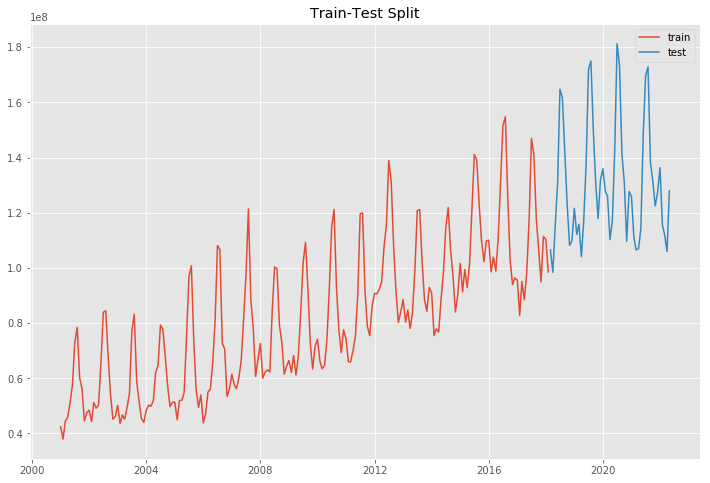

In [161]:
# Define train and test sets according to the index found above
train = nat[:cutoff]

test = nat[cutoff:]

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train, label='train')
ax.plot(test, label='test')
ax.set_title('Train-Test Split');
plt.legend();

In [162]:
split = TimeSeriesSplit()

for train_ind, val_ind in split.split(train):
    print(train_ind, val_ind)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35] [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69] [ 70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103] [104 105

In [163]:
model1 = ARIMA(train, order=(0, 1, 0)).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                    
======================================================================================
Dep. Variable:     GENERATION (Megawatthours)   No. Observations:                  206
Model:                         ARIMA(0, 1, 0)   Log Likelihood               -3638.223
Date:                        Thu, 09 Mar 2023   AIC                           7278.447
Time:                                16:01:26   BIC                           7281.770
Sample:                            01-01-2001   HQIC                          7279.791
                                 - 02-01-2018                                         
Covariance Type:                          opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.516e+14   1.51e+13     10.069      0.000    1.22e+14    1.81e+14
===================================================================================
Ljung-Box (L1) (Q):                  25.05   Jarque-Bera (JB):                 1.17
Prob(Q):                              0.00   Prob(JB):                         0.56
Heteroskedasticity (H):               1.38   Skew:                            -0.18
Prob(H) (two-sided):                  0.19   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [164]:
print(f'Model 1 AIC: {model1.aic}')

Model 1 AIC: 7278.446628014941


In [165]:
y_hat1 = model1.predict(typ='levels')
sqrt1=np.sqrt(mean_squared_error(train, y_hat1))

In [166]:
print(f'Model 1 RMSE: {sqrt1}')

Model 1 RMSE: 12660886.784568535


In [167]:
model2 = ARIMA(train, order=(1, 1, 1)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                    
======================================================================================
Dep. Variable:     GENERATION (Megawatthours)   No. Observations:                  206
Model:                         ARIMA(1, 1, 1)   Log Likelihood               -3623.546
Date:                        Thu, 09 Mar 2023   AIC                           7253.092
Time:                                16:01:26   BIC                           7263.061
Sample:                            01-01-2001   HQIC                          7257.124
                                 - 02-01-2018                                         
Covariance Type:                          opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0775      0.168      0.461      0.645      -0.252       0.407
ma.L1          0.3084      0.157      1.965      0.049       0.001       0.616
sigma2      1.357e+14        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 5.97
Prob(Q):                              0.69   Prob(JB):                         0.05
Heteroskedasticity (H):               1.32   Skew:                            -0.41
Prob(H) (two-sided):                  0.25   Kurtosis:                         3.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.93e+46. Standard errors may be unstable.
"""

In [168]:
print(f'Model 1 AIC: {model1.aic}')
print(f'Model 2 AIC: {model2.aic}')

Model 1 AIC: 7278.446628014941
Model 2 AIC: 7253.092251639383


In [169]:
y_hat2 = model2.predict(typ='levels')
sqrt2=np.sqrt(mean_squared_error(train, y_hat2))

In [170]:
print(f'Model 1 RMSE: {sqrt1}')
print(f'Model 2 RMSE: {sqrt2}')

Model 1 RMSE: 12660886.784568535
Model 2 RMSE: 11833900.18666057


In [171]:
model3 = ARIMA(train, order=(2, 1, 2)).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                    
======================================================================================
Dep. Variable:     GENERATION (Megawatthours)   No. Observations:                  206
Model:                         ARIMA(2, 1, 2)   Log Likelihood               -3600.398
Date:                        Thu, 09 Mar 2023   AIC                           7210.796
Time:                                16:01:26   BIC                           7227.411
Sample:                            01-01-2001   HQIC                          7217.516
                                 - 02-01-2018                                         
Covariance Type:                          opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2026      0.153      7.868      0.000       0.903       1.502
ar.L2         -0.5745      0.129     -4.450      0.000      -0.828      -0.321
ma.L1         -1.0430      0.185     -5.648      0.000      -1.405      -0.681
ma.L2          0.1174      0.174      0.674      0.500      -0.224       0.459
sigma2      1.168e+14        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.34
Prob(Q):                              0.85   Prob(JB):                         0.84
Heteroskedasticity (H):               1.18   Skew:                             0.08
Prob(H) (two-sided):                  0.49   Kurtosis:                         2.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.14e+46. Standard errors may be unstable.
"""

In [172]:
print(f'Model 1 AIC: {model1.aic}')
print(f'Model 2 AIC: {model2.aic}')
print(f'Model 3 AIC: {model3.aic}')

Model 1 AIC: 7278.446628014941
Model 2 AIC: 7253.092251639383
Model 3 AIC: 7210.795878436254


In [173]:
y_hat3 = model3.predict(typ='levels')
sqrt3=np.sqrt(mean_squared_error(train, y_hat3))

In [174]:
print(f'Model 1 RMSE: {sqrt1}')
print(f'Model 2 RMSE: {sqrt2}')
print(f'Model 3 RMSE: {sqrt3}')

Model 1 RMSE: 12660886.784568535
Model 2 RMSE: 11833900.18666057
Model 3 RMSE: 10647237.376868038


In [175]:
model4 = ARIMA(train, order=(2, 1, 5)).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                    
======================================================================================
Dep. Variable:     GENERATION (Megawatthours)   No. Observations:                  206
Model:                         ARIMA(2, 1, 5)   Log Likelihood               -3586.704
Date:                        Thu, 09 Mar 2023   AIC                           7189.409
Time:                                16:01:27   BIC                           7215.993
Sample:                            01-01-2001   HQIC                          7200.161
                                 - 02-01-2018                                         
Covariance Type:                          opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9319      0.027     35.160      0.000       0.880       0.984
ar.L2         -0.9009      0.027    -32.914      0.000      -0.955      -0.847
ma.L1         -0.8721      0.068    -12.870      0.000      -1.005      -0.739
ma.L2          0.7571      0.126      6.019      0.000       0.511       1.004
ma.L3         -0.2424      0.093     -2.601      0.009      -0.425      -0.060
ma.L4         -0.0235      0.083     -0.282      0.778      -0.187       0.140
ma.L5         -0.3862      0.068     -5.678      0.000      -0.519      -0.253
sigma2      7.102e+13   2.11e-15   3.37e+28      0.000     7.1e+13     7.1e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.90   Jarque-Bera (JB):                 1.99
Prob(Q):                              0.34   Prob(JB):                         0.37
Heteroskedasticity (H):               1.09   Skew:                            -0.20
Prob(H) (two-sided):                  0.73   Kurtosis:                         2.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.44e+43. Standard errors may be unstable.
"""

In [176]:
print(f'Model 1 AIC: {model1.aic}')
print(f'Model 2 AIC: {model2.aic}')
print(f'Model 3 AIC: {model3.aic}')
print(f'Model 4 AIC: {model4.aic}')

Model 1 AIC: 7278.446628014941
Model 2 AIC: 7253.092251639383
Model 3 AIC: 7210.795878436254
Model 4 AIC: 7189.408614548289


In [177]:
y_hat4 = model4.predict(typ='levels')
sqrt4=np.sqrt(mean_squared_error(train, y_hat4))

In [178]:
print(f'Model 1 RMSE: {sqrt1}')
print(f'Model 2 RMSE: {sqrt2}')
print(f'Model 3 RMSE: {sqrt3}')
print(f'Model 4 RMSE: {sqrt4}')

Model 1 RMSE: 12660886.784568535
Model 2 RMSE: 11833900.18666057
Model 3 RMSE: 10647237.376868038
Model 4 RMSE: 9967544.587460663


## Time for an ARIMA grid search on the train

In [179]:
# evaluate parameters
p_values = [1, 2, 4, 6, 8]
d_values = range(1, 5)
q_values = range(1, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

### Best model on Train, Test and All

In [180]:
model_train = ARIMA(train, order=(8, 1, 2)).fit()
#res_arma = mod_arma
print(model_train.summary())

                                   SARIMAX Results                                    
Dep. Variable:     GENERATION (Megawatthours)   No. Observations:                  206
Model:                         ARIMA(8, 1, 2)   Log Likelihood               -3540.674
Date:                        Thu, 09 Mar 2023   AIC                           7103.349
Time:                                16:01:28   BIC                           7139.902
Sample:                            01-01-2001   HQIC                          7118.134
                                 - 02-01-2018                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9525      0.111      8.570      0.000       0.735       1.170
ar.L2         -0.8388      0.152     -5.523      0.000      -1.136 

In [181]:
y_hat_train = model_train.predict(typ='levels')
RMSE_train=np.sqrt(mean_squared_error(train, y_hat_train))
RMSE_train

7902881.737214053

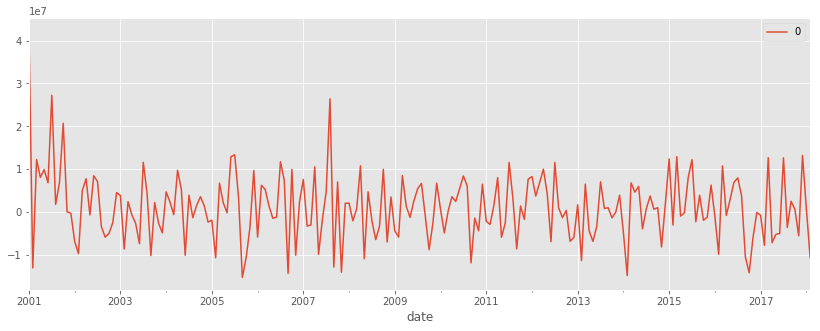

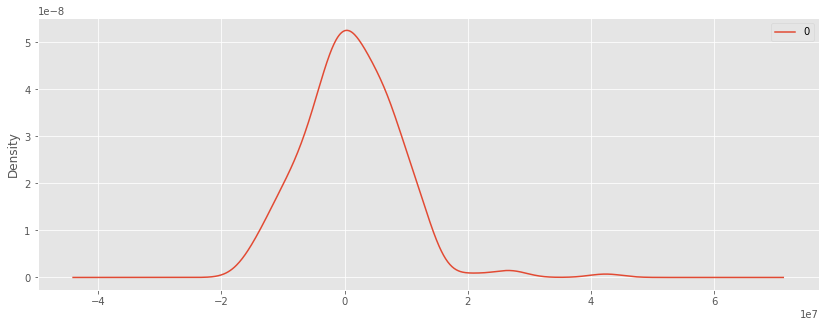

                  0
count  2.060000e+02
mean   1.147571e+06
std    7.838167e+06
min   -1.523342e+07
25%   -3.481317e+06
50%    8.638356e+05
75%    6.301137e+06
max    4.238866e+07


In [182]:
# line plot of residuals
residuals = pd.DataFrame(model_train.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())


In [183]:
residuals.dropna(inplace=True)
dftest = adfuller(residuals)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',\
        'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -5.816109e+00
p-value                        4.288769e-07
#Lags Used                     1.100000e+01
Number of Observations Used    1.940000e+02
Critical Value (1%)           -3.464515e+00
Critical Value (5%)           -2.876556e+00
Critical Value (10%)          -2.574775e+00
dtype: float64


### Best model on test

In [184]:
model_test = ARIMA(test, order=(8, 1, 2)).fit()
#res_arma = mod_arma
print(model_test.summary())

                                   SARIMAX Results                                    
Dep. Variable:     GENERATION (Megawatthours)   No. Observations:                   51
Model:                         ARIMA(8, 1, 2)   Log Likelihood                -892.707
Date:                        Thu, 09 Mar 2023   AIC                           1807.413
Time:                                16:01:29   BIC                           1828.445
Sample:                            03-01-2018   HQIC                          1815.422
                                 - 05-01-2022                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2002      0.121      9.954      0.000       0.964       1.437
ar.L2         -0.6994      0.156     -4.472      0.000      -1.006 

In [185]:
y_hat_test = model_test.predict(typ='levels')
RMSE_test=np.sqrt(mean_squared_error(test, y_hat_test))
RMSE_test

20225072.854886938

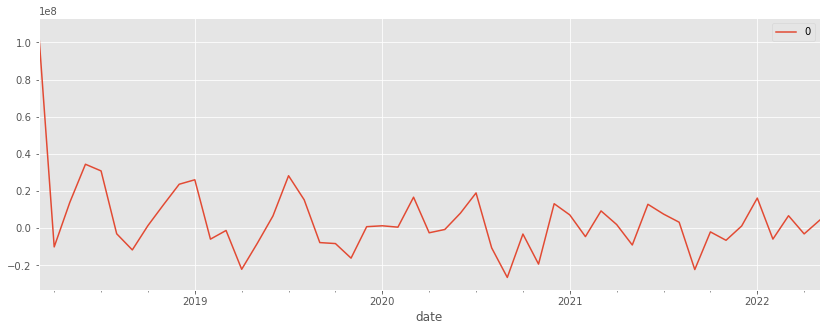

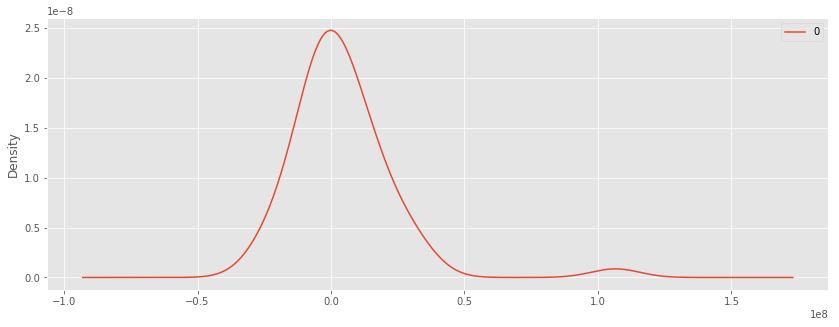

                  0
count  5.100000e+01
mean   4.305319e+06
std    1.995816e+07
min   -2.651525e+07
25%   -6.202989e+06
50%    1.183041e+06
75%    1.278110e+07
max    1.065238e+08


In [186]:
# line plot of residuals
residuals = pd.DataFrame(model_test.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [187]:
residuals.dropna(inplace=True)
dftest = adfuller(residuals)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',\
        'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                 -4.010250
p-value                         0.001358
#Lags Used                     11.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64


### Best model on all data

In [188]:
model_all = ARIMA(nat, order=(8, 1, 2)).fit()
#res_arma = mod_arma.fit()
print(model_all.summary())

                                   SARIMAX Results                                    
Dep. Variable:     GENERATION (Megawatthours)   No. Observations:                  257
Model:                         ARIMA(8, 1, 2)   Log Likelihood               -4434.166
Date:                        Thu, 09 Mar 2023   AIC                           8890.332
Time:                                16:01:30   BIC                           8929.329
Sample:                            01-01-2001   HQIC                          8906.017
                                 - 05-01-2022                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9181      0.106      8.639      0.000       0.710       1.126
ar.L2         -0.7517      0.147     -5.111      0.000      -1.040 

In [189]:
y_hat_all = model_all.predict(typ='levels')
RMSE_all=np.sqrt(mean_squared_error(nat, y_hat_all))
RMSE_all

8046125.34016141

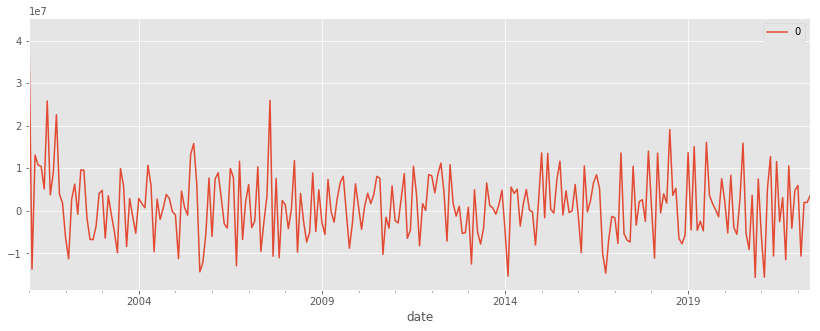

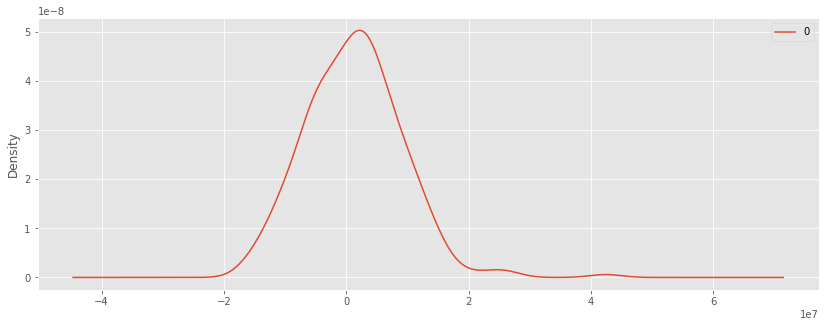

                  0
count  2.570000e+02
mean   1.278501e+06
std    7.959402e+06
min   -1.564832e+07
25%   -4.494847e+06
50%    1.391347e+06
75%    5.972360e+06
max    4.238866e+07


In [190]:
# line plot of residuals
residuals = pd.DataFrame(model_all.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [191]:
residuals.dropna(inplace=True)
dftest = adfuller(residuals)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',\
        'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                  -5.062618
p-value                          0.000017
#Lags Used                      13.000000
Number of Observations Used    243.000000
Critical Value (1%)             -3.457551
Critical Value (5%)             -2.873509
Critical Value (10%)            -2.573148
dtype: float64


In [192]:
print(f'Model train AIC: {model_train.aic}')
print(f'Model test  AIC: {model_test.aic}')
print(f'Model all   AIC: {model_all.aic}')

Model train AIC: 7103.348919392339
Model test  AIC: 1807.413005987119
Model all   AIC: 8890.332448197298


In [193]:
print(f'Model train RMSE: {RMSE_train}')
print(f'Model test  RMSE: {RMSE_test}')
print(f'Model all   RMSE: {RMSE_all}')

Model train RMSE: 7902881.737214053
Model test  RMSE: 20225072.854886938
Model all   RMSE: 8046125.34016141


Ok. A bit crazy. The test turned out to have the best AIC but is also the one with the worst RMSE.

Let's move on to...

The search we did was based on the RMSE.
Let us see if the result is different using another function, that evaluates the model on the AIC instead.

### ARIMA search AIC

In [219]:
# using AIC as a parameter
# evaluate parameters
p_values = [1, 2, 4, 6, 8]
d_values = range(1, 5)
q_values = range(1, 5)
warnings.filterwarnings("ignore")
evaluate_models_aic(train.values, p_values, d_values, q_values)

ARIMA(1, 1, 1) AIC=4737.542
ARIMA(1, 1, 2) AIC=4722.515
ARIMA(1, 1, 3) AIC=4715.694
ARIMA(1, 1, 4) AIC=4737.971
ARIMA(1, 2, 1) AIC=4711.908
ARIMA(1, 2, 2) AIC=4709.835
ARIMA(1, 2, 3) AIC=4709.401
ARIMA(1, 2, 4) AIC=4710.955
ARIMA(1, 3, 1) AIC=4732.800
ARIMA(1, 3, 2) AIC=4727.647
ARIMA(1, 3, 3) AIC=4696.316
ARIMA(1, 3, 4) AIC=4703.907
ARIMA(1, 4, 1) AIC=4776.324
ARIMA(1, 4, 2) AIC=4718.545
ARIMA(1, 4, 3) AIC=4706.992
ARIMA(1, 4, 4) AIC=4697.459
ARIMA(2, 1, 1) AIC=4711.208
ARIMA(2, 1, 2) AIC=4699.815
ARIMA(2, 1, 3) AIC=4694.176
ARIMA(2, 1, 4) AIC=4762.193
ARIMA(2, 2, 1) AIC=4708.054
ARIMA(2, 2, 2) AIC=4688.463
ARIMA(2, 2, 3) AIC=4686.885
ARIMA(2, 2, 4) AIC=4708.443
ARIMA(2, 3, 1) AIC=4731.370
ARIMA(2, 3, 2) AIC=4690.815
ARIMA(2, 3, 3) AIC=4719.202
ARIMA(2, 3, 4) AIC=4693.399
ARIMA(2, 4, 1) AIC=4771.400
ARIMA(2, 4, 2) AIC=4713.192
ARIMA(2, 4, 3) AIC=4705.625
ARIMA(2, 4, 4) AIC=4711.220
ARIMA(4, 1, 1) AIC=4729.077
ARIMA(4, 1, 2) AIC=4715.442
ARIMA(4, 1, 3) AIC=4701.454
ARIMA(4, 1, 4) AIC=4

## SARIMAX

In [194]:
import statsmodels.api as sm
# specify training data
data = train
# define model configuration
my_order = (1, 1, 1)
my_seasonal_order = (1, 1, 1, 12)
# define model
model = sm.tsa.statespace.SARIMAX(data, order=my_order, seasonal_order=my_seasonal_order)

In [195]:
# fit model
model_fit = model.fit()

In [196]:
# one step forecast
yhat = model_fit.predict()

In [197]:
RMSE=np.sqrt(mean_squared_error(train, yhat))
RMSE

6793654.136645261

In [198]:
import statsmodels.api as sm
# specify training data
data = train
# define model configuration
my_order = (8, 1, 2)
my_seasonal_order = (1, 1, 1, 12)
# define model
model = sm.tsa.statespace.SARIMAX(data, order=my_order, seasonal_order=my_seasonal_order)

In [199]:
# fit model
model_fit = model.fit()
# one step forecast
yhat = model_fit.predict()
RMSE=np.sqrt(mean_squared_error(train, yhat))
RMSE

6832305.5105808

In [200]:
data = train
my_order = (8, 1, 2)
my_seasonal_order = (2, 1, 2, 12)
# define model
model = sm.tsa.statespace.SARIMAX(data, order=my_order, seasonal_order=my_seasonal_order)

In [201]:
# fit model
model_fit = model.fit()
# one step forecast
yhat = model_fit.predict()
RMSE=np.sqrt(mean_squared_error(train, yhat))
RMSE

6815616.715811368

In [202]:
data = train
my_order = (8, 1, 2)
my_seasonal_order = (4, 1, 2, 12)
# define model
model = sm.tsa.statespace.SARIMAX(data, order=my_order, seasonal_order=my_seasonal_order)

In [203]:
# fit model
model_fit = model.fit()
# one step forecast
yhat = model_fit.predict()
RMSE=np.sqrt(mean_squared_error(train, yhat))
RMSE

6804976.1218289025

In [204]:
data = train
my_order = (8, 1, 2)
my_seasonal_order = (6, 1, 2, 12)
# define model
model = sm.tsa.statespace.SARIMAX(data, order=my_order, seasonal_order=my_seasonal_order)

In [205]:
# fit model
model_fit = model.fit()
# one step forecast
yhat = model_fit.predict()
RMSE=np.sqrt(mean_squared_error(train, yhat))
RMSE

6786378.117125575

### Let's try another grid search for ARIMA

In [208]:
# evaluate parameters
p_values = [8, 10, 12, 20]
d_values = [1]
q_values = [2]
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(8, 1, 2) MSE=50292320376392.664
ARIMA(10, 1, 2) MSE=47342777608446.664
ARIMA(12, 1, 2) MSE=43079294019798.711
ARIMA(20, 1, 2) MSE=42655124448823.727
Best ARIMA(20, 1, 2) MSE=42655124448823.727


In [210]:
model = ARIMA(train, order=(20, 1, 2)).fit()
#res_arma = mod_arma
print(model.summary())

                                   SARIMAX Results                                    
Dep. Variable:     GENERATION (Megawatthours)   No. Observations:                  206
Model:                        ARIMA(20, 1, 2)   Log Likelihood               -3504.426
Date:                        Thu, 09 Mar 2023   AIC                           7054.851
Time:                                16:21:44   BIC                           7131.280
Sample:                            01-01-2001   HQIC                          7085.765
                                 - 02-01-2018                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1783      0.808      0.221      0.825      -1.405       1.762
ar.L2         -0.0411      0.763     -0.054      0.957      -1.536 

In [211]:
y_hat_train = model.predict(typ='levels')
RMSE_train=np.sqrt(mean_squared_error(train, y_hat_train))
RMSE_train

7276116.177028469

In [212]:
residuals.dropna(inplace=True)
dftest = adfuller(residuals)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',\
        'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print ('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                  -5.062618
p-value                          0.000017
#Lags Used                      13.000000
Number of Observations Used    243.000000
Critical Value (1%)             -3.457551
Critical Value (5%)             -2.873509
Critical Value (10%)            -2.573148
dtype: float64


In [213]:
model = ARIMA(test, order=(20, 1, 2)).fit()
#res_arma = mod_arma
print(model.summary())

                                   SARIMAX Results                                    
Dep. Variable:     GENERATION (Megawatthours)   No. Observations:                   51
Model:                        ARIMA(20, 1, 2)   Log Likelihood                -937.335
Date:                        Thu, 09 Mar 2023   AIC                           1920.670
Time:                                16:23:27   BIC                           1964.647
Sample:                            03-01-2018   HQIC                          1937.417
                                 - 05-01-2022                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6774      0.376      1.803      0.071      -0.059       1.414
ar.L2         -0.1741      0.170     -1.023      0.306      -0.507 

In [214]:
y_hat_test = model.predict(typ='levels')
RMSE_test=np.sqrt(mean_squared_error(test, y_hat_test))
RMSE_test

19407593.84506086

So, that is good but I have to start to keep in mind overfitting because that's what becomes an issue